In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [44]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [45]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [46]:
df= df.drop('YearMonth',axis=1)

In [47]:
df.head()

,Rose,Time_Stamp
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [48]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [49]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [50]:
df.isnull().sum()

Rose    2
dtype: int64

In [51]:
# Missing values in Time Series in python
df['Rose'].interpolate(method='linear', inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [53]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [54]:
df.isnull().sum()

Rose    0
dtype: int64

In [55]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

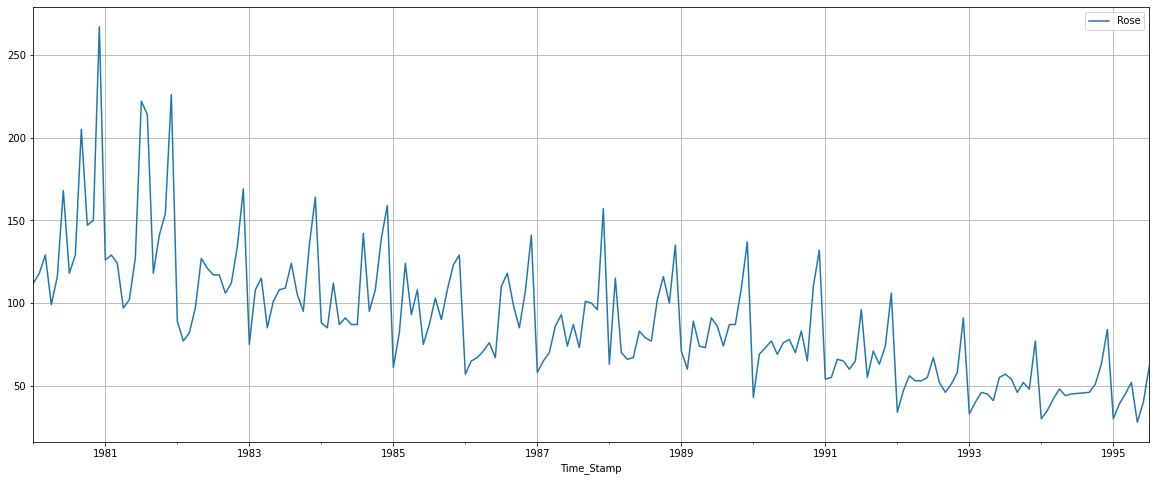

In [56]:
df.plot()
plt.grid();

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [58]:
df.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [59]:
df.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)

In [60]:
df.isnull().sum()

Rose    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


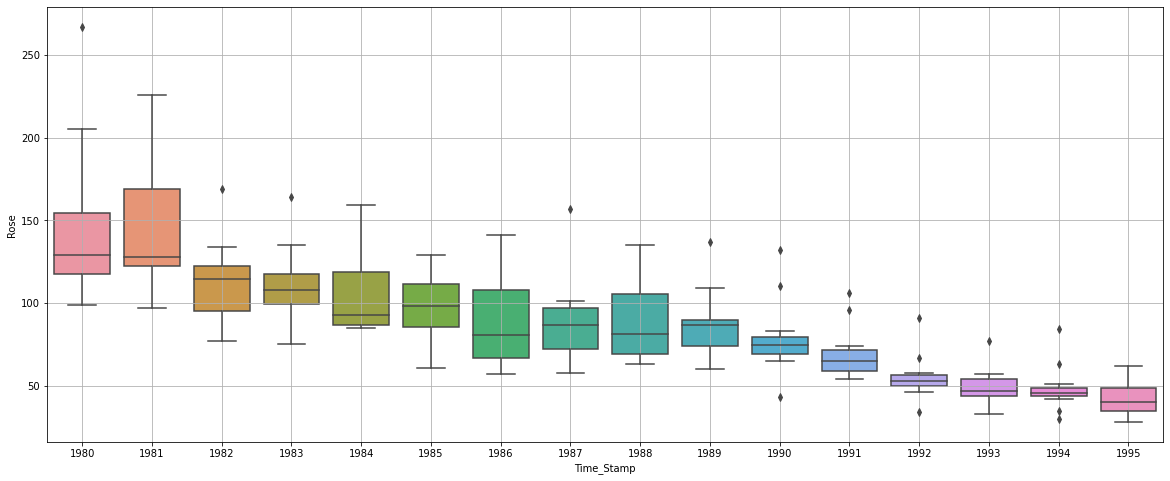

In [62]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

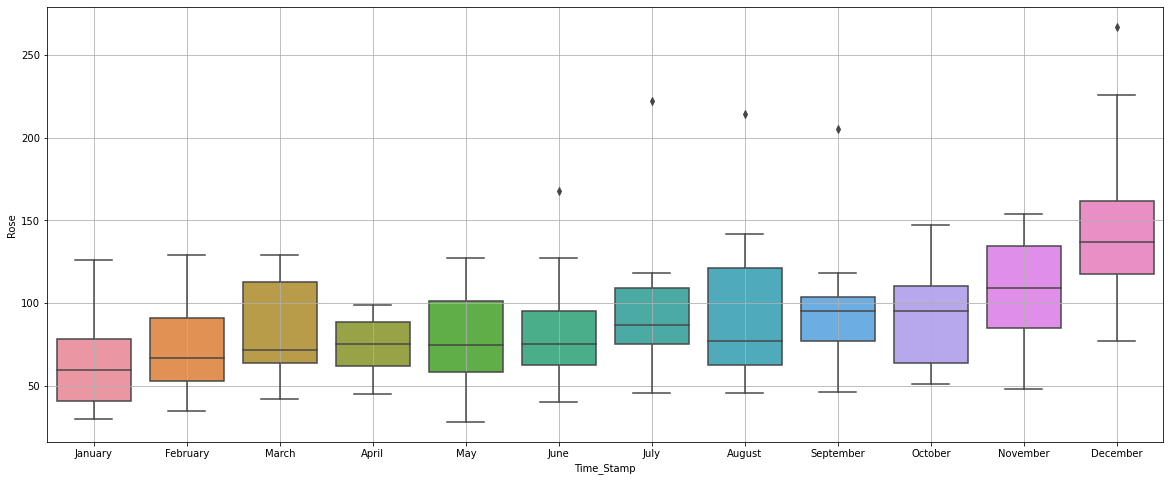

In [63]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

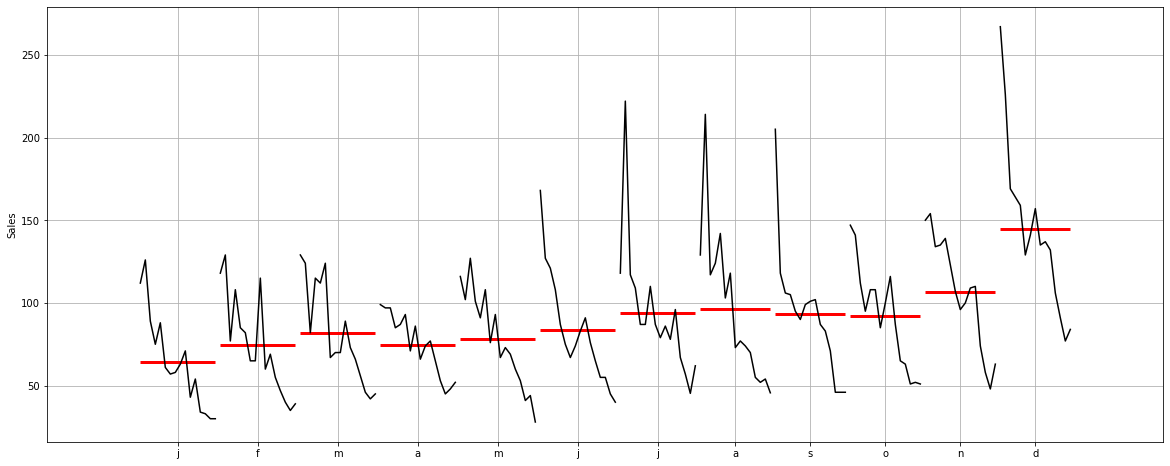

In [64]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [65]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


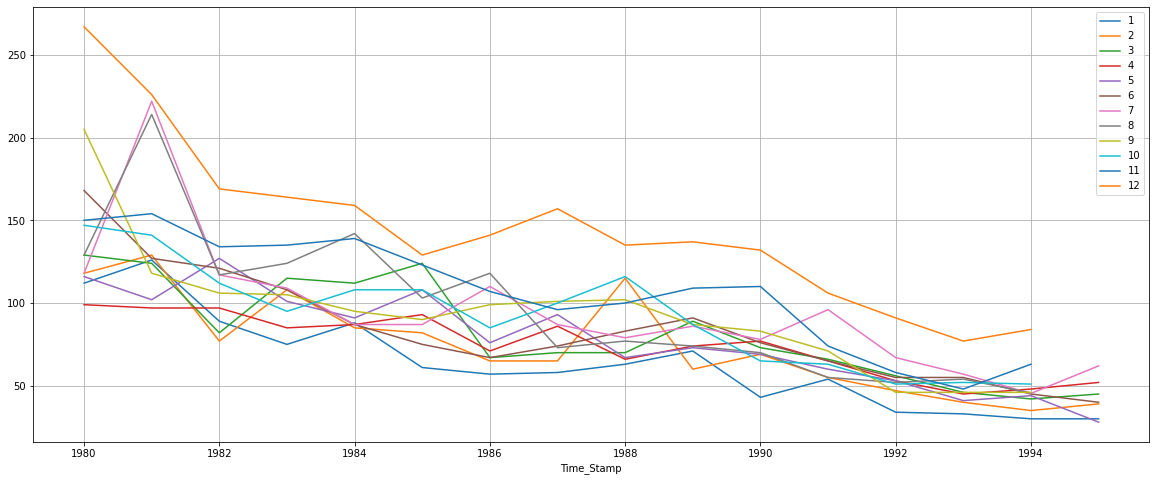

In [66]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

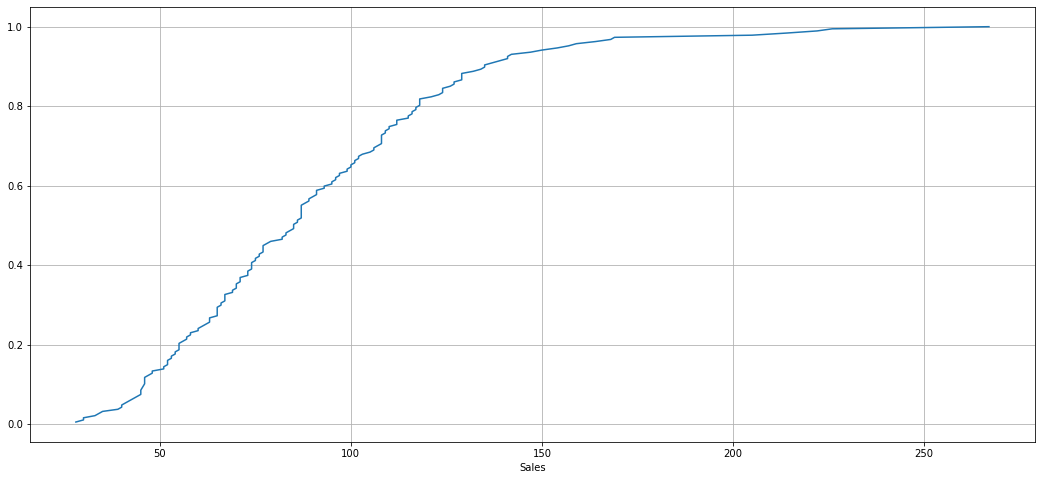

In [67]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

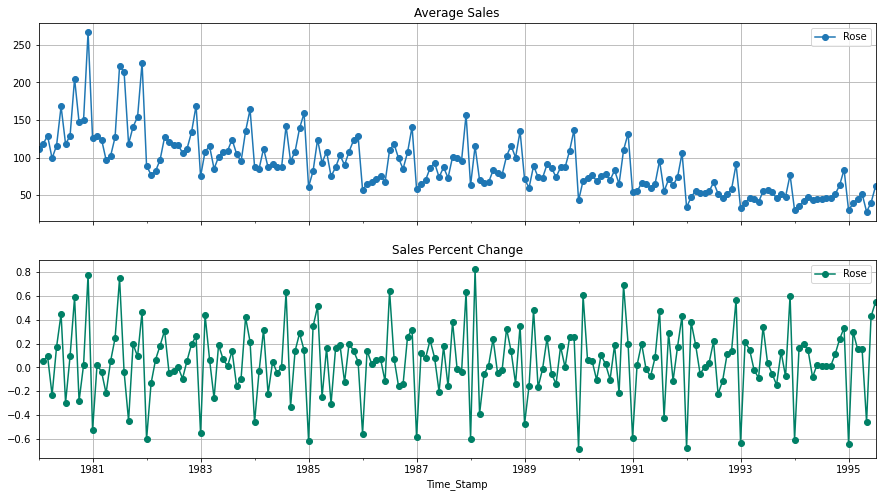

In [68]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

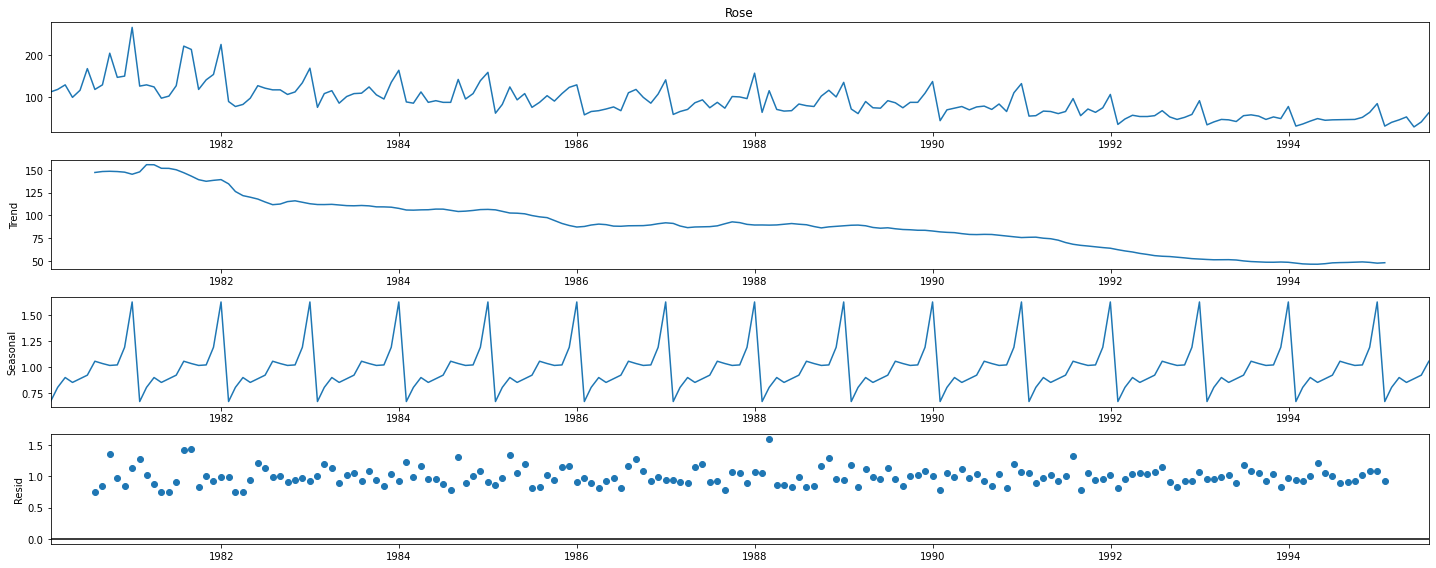

In [69]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [70]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

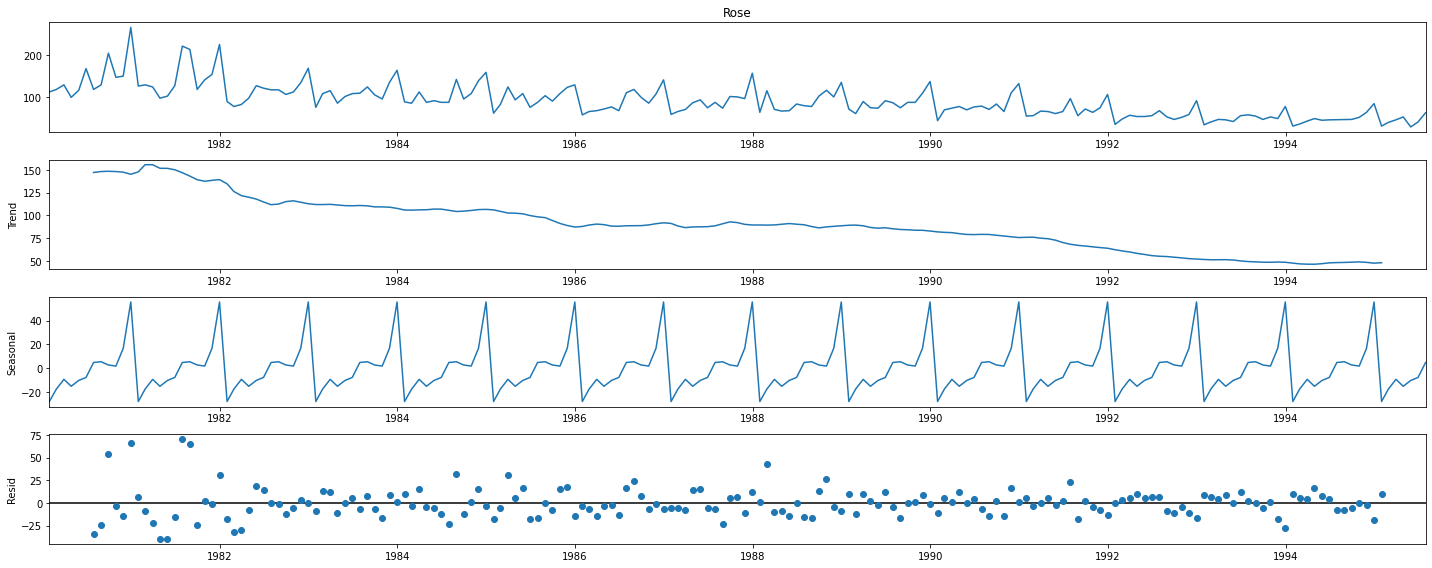

In [71]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [40]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

# Check for stationarity of the whole Time Series data at  𝛼  =0.05

In [72]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

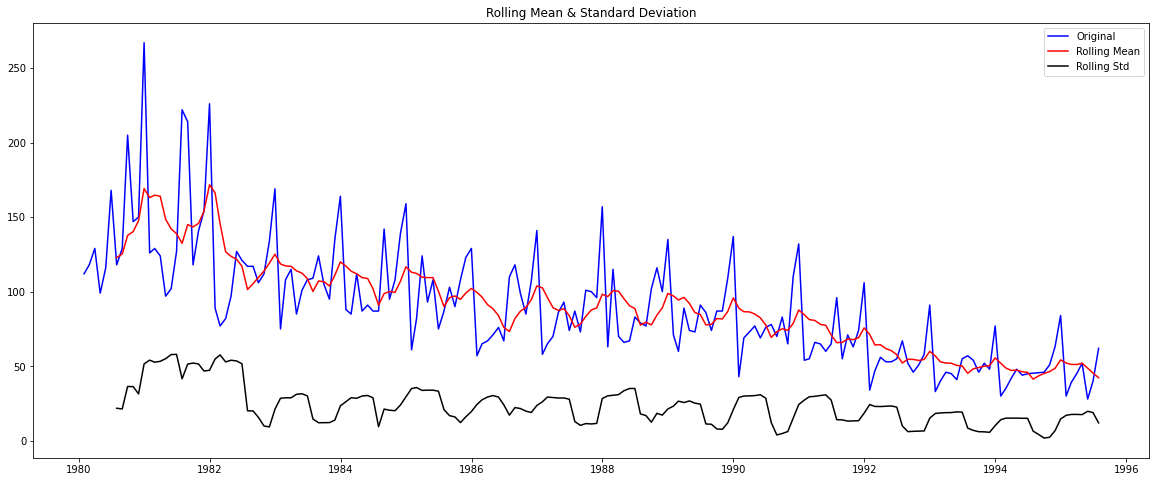

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [73]:
test_stationarity(df['Rose'])

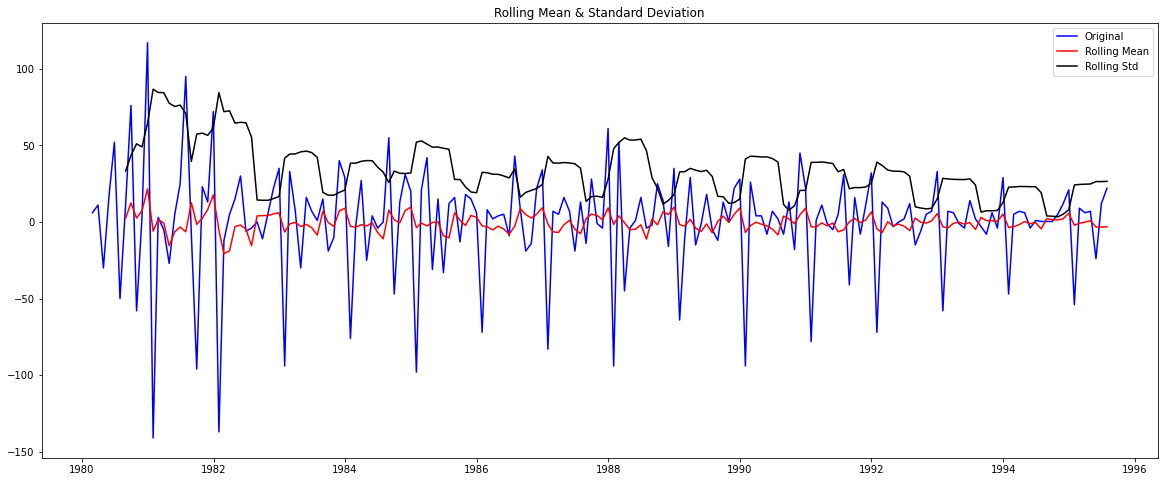

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [36]:
test_stationarity(df['Rose'].diff().dropna())

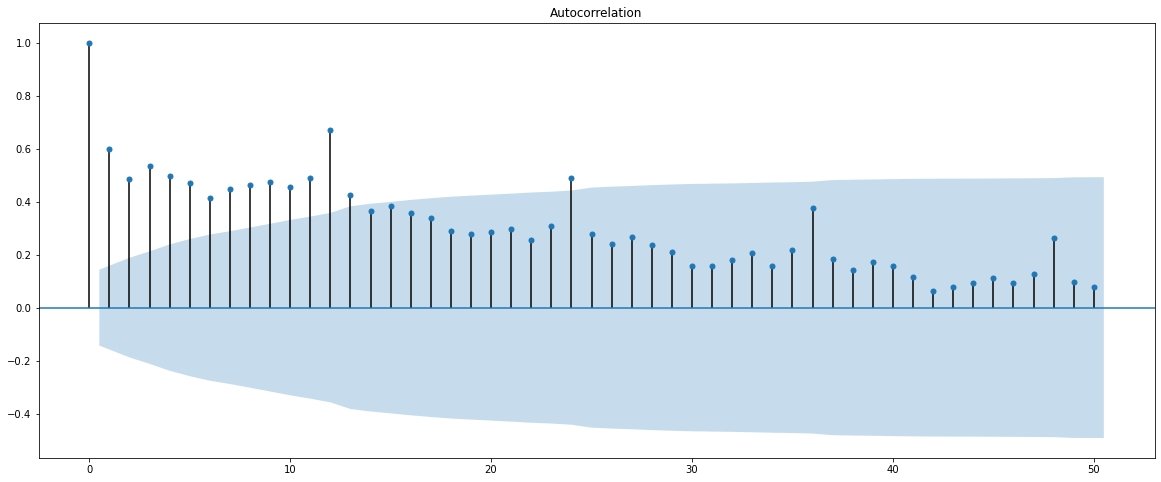

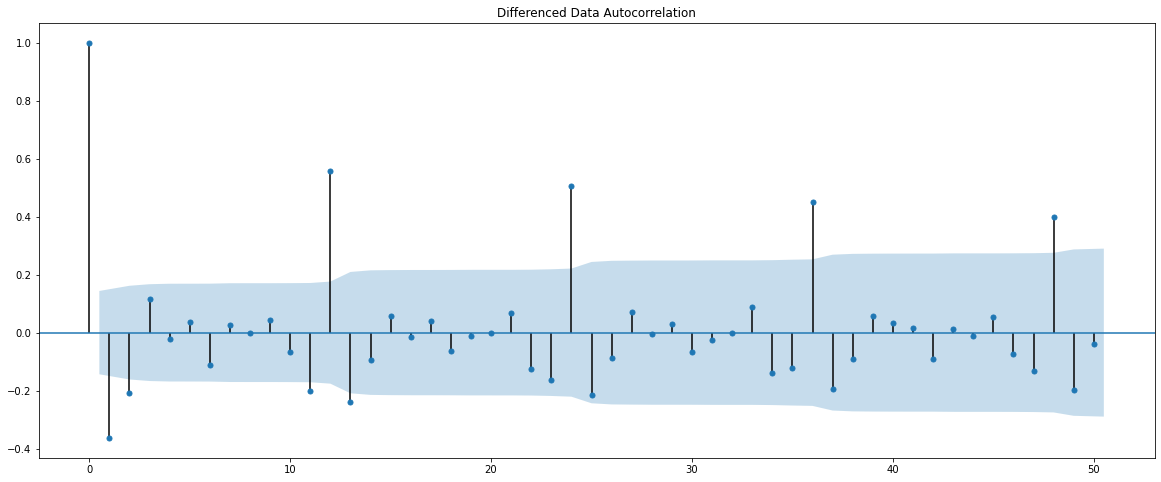

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

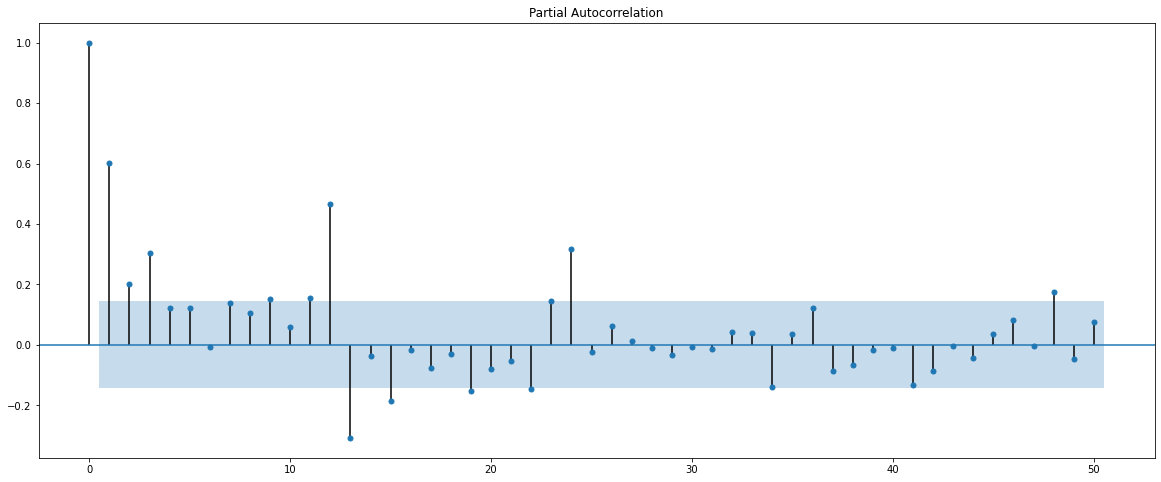

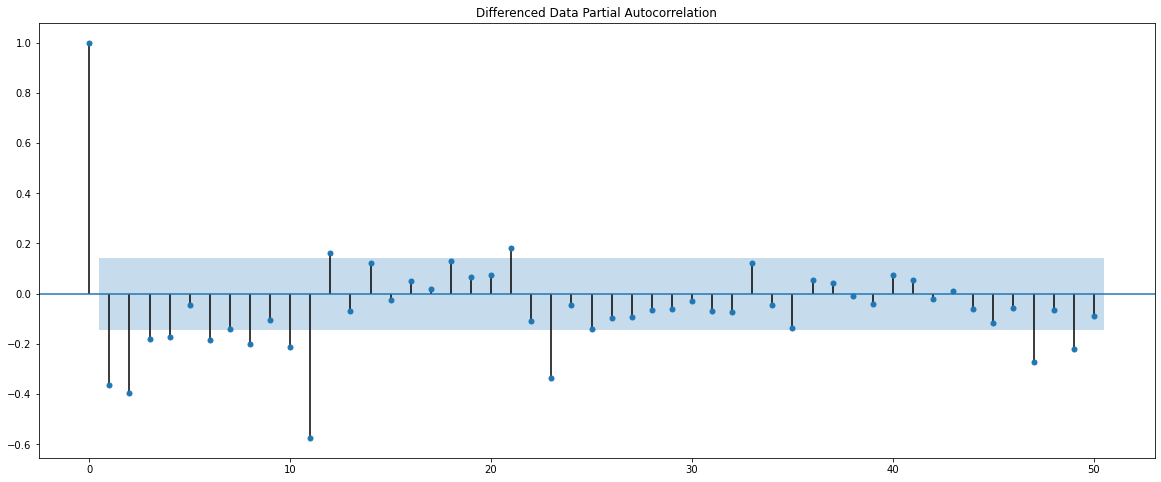

In [75]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [76]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [77]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [78]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [79]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


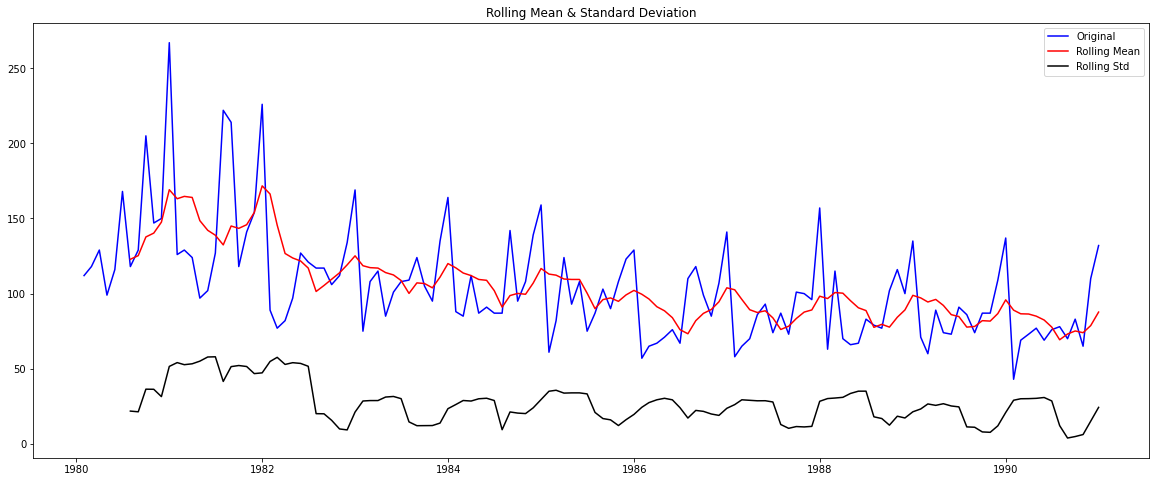

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [80]:
test_stationarity(train['Rose'])

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [89]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [90]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [91]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057684467
ARIMA(0, 0, 2) - AIC:1306.5866794772203
ARIMA(0, 0, 3) - AIC:1302.3447240402004
ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464045
ARIMA(0, 1, 2) - AIC:1276.8353720852406
ARIMA(0, 1, 3) - AIC:1278.0742569737254
ARIMA(1, 0, 0) - AIC:1301.5463044353148
ARIMA(1, 0, 1) - AIC:1294.510585183727
ARIMA(1, 0, 2) - AIC:1292.0532102460786
ARIMA(1, 0, 3) - AIC:1292.929010501804
ARIMA(1, 1, 0) - AIC:1319.348310580188
ARIMA(1, 1, 1) - AIC:1277.775747885047
ARIMA(1, 1, 2) - AIC:1277.3592217495348
ARIMA(1, 1, 3) - AIC:1279.3126337527572
ARIMA(2, 0, 0) - AIC:1302.3460741784133
ARIMA(2, 0, 1) - AIC:1292.9371945695982
ARIMA(2, 0, 2) - AIC:1292.2480553307776
ARIMA(2, 0, 3) - AIC:1294.2479384688215
ARIMA(2, 1, 0) - AIC:1300.6092611747547
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939365824
ARIMA(2, 1, 3) - AIC:1281.1962260426956
ARIMA(3, 0, 0) - AIC:1296.7743305595764


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(3, 0, 1) - AIC:1333.9689674590009


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(3, 0, 2) - AIC:1355.475495617805


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


ARIMA(3, 0, 3) - AIC:1293.04271233507
ARIMA(3, 1, 0) - AIC:1299.478739154339
ARIMA(3, 1, 1) - AIC:1279.6059642471641
ARIMA(3, 1, 2) - AIC:1280.96924636221
ARIMA(3, 1, 3) - AIC:1273.194130363102


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [92]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


,param,AIC
31,"(3, 1, 3)",1273.194130
6,"(0, 1, 2)",1276.835372
14,"(1, 1, 2)",1277.359222
13,"(1, 1, 1)",1277.775748
7,"(0, 1, 3)",1278.074257
21,"(2, 1, 1)",1279.045689
22,"(2, 1, 2)",1279.298694
15,"(1, 1, 3)",1279.312634
29,"(3, 1, 1)",1279.605964
5,"(0, 1, 1)",1280.726183


In [93]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.355
Date:                Wed, 09 Sep 2020   AIC                           1273.194
Time:                        09:27:26   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4907      0.088     -5.549      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.418      0.000      -0.893      -0.556
ar.L2.D.Rose    -0.7217      0.086     -8.35

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


# Predict on the Test Set using this model and evaluate the model

In [94]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [95]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.98395202069059


In [96]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf

,RMSE
"ARIMA(3,1,3)",15.983952


# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

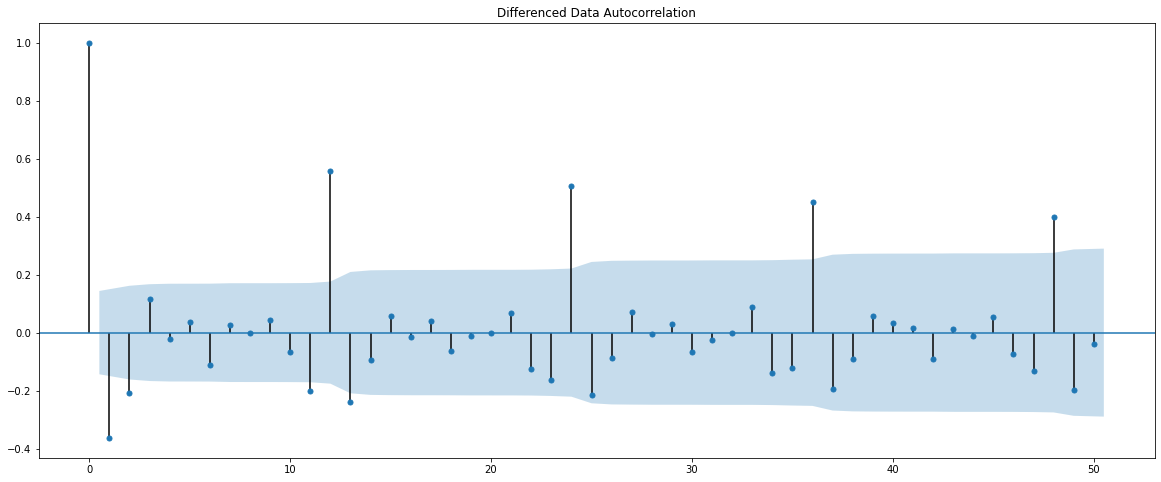

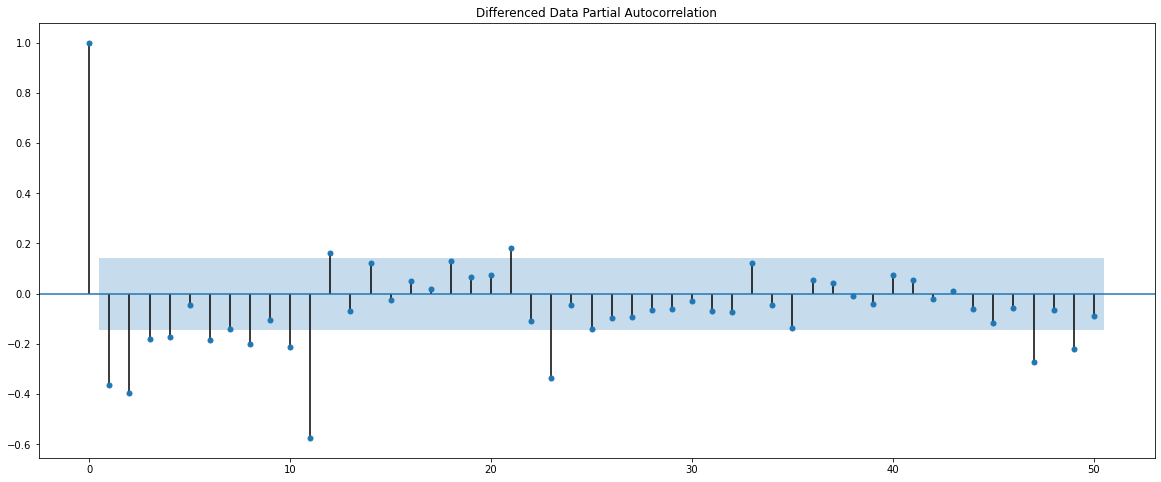

In [97]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [98]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.949
Date:                Wed, 09 Sep 2020   AIC                           1280.969
Time:                        10:06:15   BIC                           1301.096
Sample:                    02-29-1980   HQIC                          1289.147
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.655      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.284      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

In [99]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Wed, 09 Sep 2020   AIC                           1283.753
Time:                        10:06:18   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Predict on the Test Set using this model and evaluate the model.

In [100]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)


33.94934770138051


In [101]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ManualARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(3,1,3)",15.983952
"ManualARIMA(4,1,2)",33.949348


# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

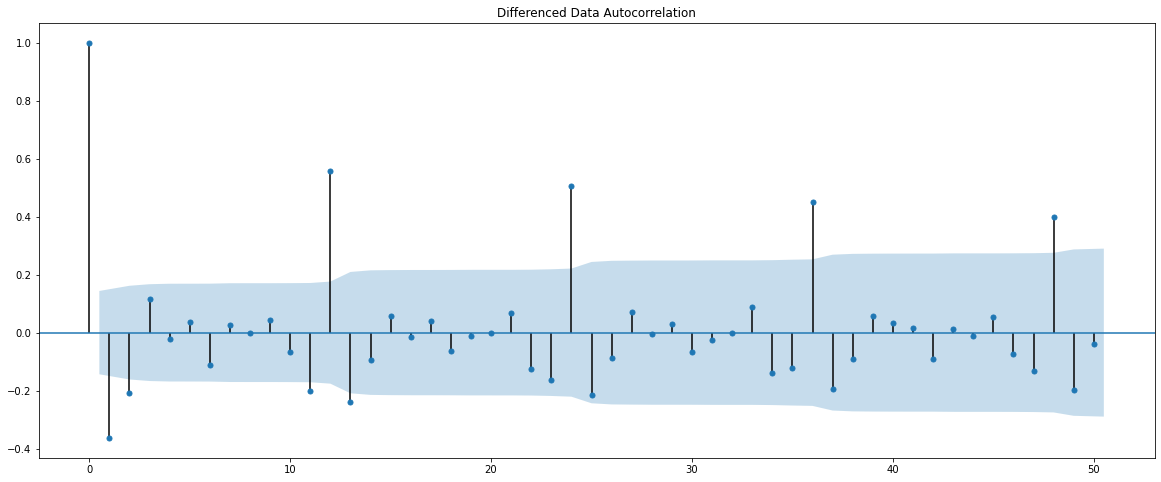

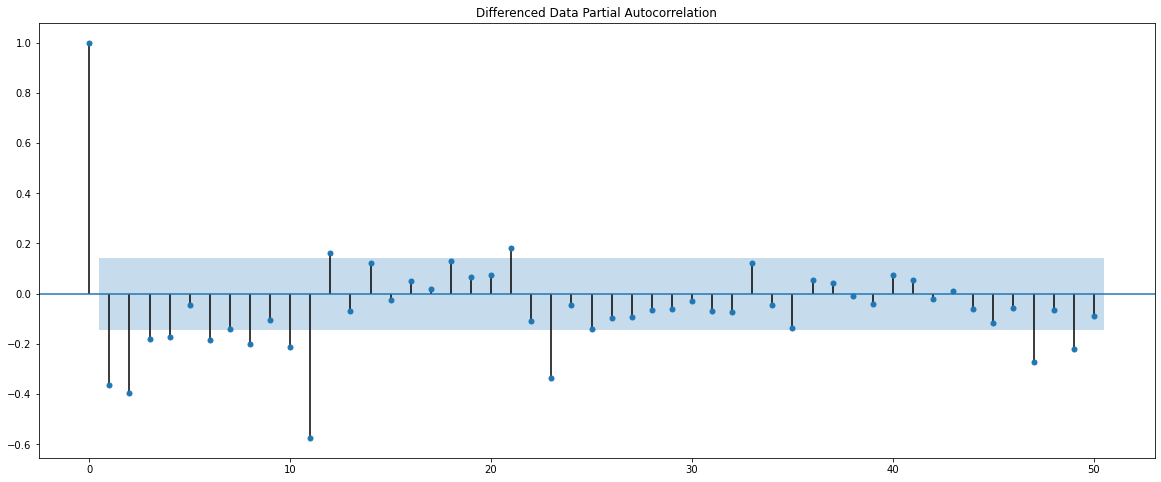

In [102]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [103]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [104]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [105]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:1342.8879796320248
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:1127.693967124787


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(0, 0, 3, 12)7 - AIC:4308.268533513036
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:973.2839647223815
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:819.2632583078563


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:1072.6552136762793
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:947.5166303995366


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(1, 0, 3, 12)7 - AIC:1869.7857694714303
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:970.9074506135763
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:821.1204806442078


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(1, 1, 3, 12)7 - AIC:3660.155796037095
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:939.9681316162018
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:941.4830998913757
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:931.5268645822525
SARIMA(0, 0, 0)x(2, 0, 3, 12)7 - AIC:790.5355864495572
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:828.5116218528782
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:822.8736936087154
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:814.9165425602748


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(2, 1, 3, 12)7 - AIC:1934.3628579121178
SARIMA(0, 0, 0)x(3, 0, 0, 12)7 - AIC:805.8726073222581
SARIMA(0, 0, 0)x(3, 0, 1, 12)7 - AIC:800.8990563485768
SARIMA(0, 0, 0)x(3, 0, 2, 12)7 - AIC:800.1344486634049
SARIMA(0, 0, 0)x(3, 0, 3, 12)7 - AIC:790.6595144952126
SARIMA(0, 0, 0)x(3, 1, 0, 12)7 - AIC:722.583010390756
SARIMA(0, 0, 0)x(3, 1, 1, 12)7 - AIC:719.373169938168
SARIMA(0, 0, 0)x(3, 1, 2, 12)7 - AIC:717.5483614052192


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 0)x(3, 1, 3, 12)7 - AIC:2058.947776761667
SARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:1481.8198652085205
SARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:1253.5306740985561
SARIMA(0, 0, 1)x(0, 0, 2, 12)7 - AIC:1091.996925731481


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(0, 0, 3, 12)7 - AIC:2385.175459176038
SARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:1114.420134879941
SARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:943.2706750235644
SARIMA(0, 0, 1)x(0, 1, 2, 12)7 - AIC:808.6737781862022


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:1115.813300487449
SARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:1060.294596220271
SARIMA(0, 0, 1)x(1, 0, 2, 12)7 - AIC:930.2924267972977


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(1, 0, 3, 12)7 - AIC:2553.27539249794
SARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:965.5355307816878
SARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:945.19374661171
SARIMA(0, 0, 1)x(1, 1, 2, 12)7 - AIC:810.6736097092657


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(1, 1, 3, 12)7 - AIC:2010.343729352795
SARIMA(0, 0, 1)x(2, 0, 0, 12)7 - AIC:933.4715560674252
SARIMA(0, 0, 1)x(2, 0, 1, 12)7 - AIC:935.4796047117968
SARIMA(0, 0, 1)x(2, 0, 2, 12)7 - AIC:915.769465198391


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(2, 0, 3, 12)7 - AIC:782.7491606202144
SARIMA(0, 0, 1)x(2, 1, 0, 12)7 - AIC:825.992719642449
SARIMA(0, 0, 1)x(2, 1, 1, 12)7 - AIC:821.7035173726947
SARIMA(0, 0, 1)x(2, 1, 2, 12)7 - AIC:803.546465576565


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(2, 1, 3, 12)7 - AIC:2881.7646305426106
SARIMA(0, 0, 1)x(3, 0, 0, 12)7 - AIC:807.0365395121242
SARIMA(0, 0, 1)x(3, 0, 1, 12)7 - AIC:802.4993177618528
SARIMA(0, 0, 1)x(3, 0, 2, 12)7 - AIC:801.7327134076613
SARIMA(0, 0, 1)x(3, 0, 3, 12)7 - AIC:786.0502573529508
SARIMA(0, 0, 1)x(3, 1, 0, 12)7 - AIC:722.4846415428867
SARIMA(0, 0, 1)x(3, 1, 1, 12)7 - AIC:725.3154546391348
SARIMA(0, 0, 1)x(3, 1, 2, 12)7 - AIC:719.875893834931


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 1)x(3, 1, 3, 12)7 - AIC:2708.2501443640895
SARIMA(0, 0, 2)x(0, 0, 0, 12)7 - AIC:1426.8445495317026
SARIMA(0, 0, 2)x(0, 0, 1, 12)7 - AIC:1196.6906693696083
SARIMA(0, 0, 2)x(0, 0, 2, 12)7 - AIC:1021.9681627946836


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(0, 0, 3, 12)7 - AIC:2251.205025059094
SARIMA(0, 0, 2)x(0, 1, 0, 12)7 - AIC:1106.2419988707352
SARIMA(0, 0, 2)x(0, 1, 1, 12)7 - AIC:929.9087508309578
SARIMA(0, 0, 2)x(0, 1, 2, 12)7 - AIC:800.4805045800442


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(0, 1, 3, 12)7 - AIC:5825.004256989018
SARIMA(0, 0, 2)x(1, 0, 0, 12)7 - AIC:1115.18445245071
SARIMA(0, 0, 2)x(1, 0, 1, 12)7 - AIC:1090.9215596613778
SARIMA(0, 0, 2)x(1, 0, 2, 12)7 - AIC:924.1097257917844


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(1, 0, 3, 12)7 - AIC:2045.005379285582
SARIMA(0, 0, 2)x(1, 1, 0, 12)7 - AIC:961.7175036298936
SARIMA(0, 0, 2)x(1, 1, 1, 12)7 - AIC:933.302477621294
SARIMA(0, 0, 2)x(1, 1, 2, 12)7 - AIC:802.3231411902524


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(1, 1, 3, 12)7 - AIC:2514.989548702753
SARIMA(0, 0, 2)x(2, 0, 0, 12)7 - AIC:934.6776297588852
SARIMA(0, 0, 2)x(2, 0, 1, 12)7 - AIC:936.6693494473208
SARIMA(0, 0, 2)x(2, 0, 2, 12)7 - AIC:907.1203055260953
SARIMA(0, 0, 2)x(2, 0, 3, 12)7 - AIC:774.6613141249951
SARIMA(0, 0, 2)x(2, 1, 0, 12)7 - AIC:826.8304040082928
SARIMA(0, 0, 2)x(2, 1, 1, 12)7 - AIC:823.3580232515485
SARIMA(0, 0, 2)x(2, 1, 2, 12)7 - AIC:794.5290246268371


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(2, 1, 3, 12)7 - AIC:3124.973359929477
SARIMA(0, 0, 2)x(3, 0, 0, 12)7 - AIC:808.8518832376965
SARIMA(0, 0, 2)x(3, 0, 1, 12)7 - AIC:810.887171473904
SARIMA(0, 0, 2)x(3, 0, 2, 12)7 - AIC:810.3215018096539
SARIMA(0, 0, 2)x(3, 0, 3, 12)7 - AIC:776.0497777230335
SARIMA(0, 0, 2)x(3, 1, 0, 12)7 - AIC:723.2482619461686
SARIMA(0, 0, 2)x(3, 1, 1, 12)7 - AIC:725.2564266233132
SARIMA(0, 0, 2)x(3, 1, 2, 12)7 - AIC:719.9961636264443


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 2)x(3, 1, 3, 12)7 - AIC:2911.0093363878295
SARIMA(0, 0, 3)x(0, 0, 0, 12)7 - AIC:1385.4078859731017
SARIMA(0, 0, 3)x(0, 0, 1, 12)7 - AIC:1173.1293072849355
SARIMA(0, 0, 3)x(0, 0, 2, 12)7 - AIC:1000.9671775424218


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(0, 0, 3, 12)7 - AIC:2802.274302955254
SARIMA(0, 0, 3)x(0, 1, 0, 12)7 - AIC:1099.5699295154259
SARIMA(0, 0, 3)x(0, 1, 1, 12)7 - AIC:923.8262227283884
SARIMA(0, 0, 3)x(0, 1, 2, 12)7 - AIC:793.3233027448184


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(0, 0, 3)x(1, 0, 0, 12)7 - AIC:1117.188129767219
SARIMA(0, 0, 3)x(1, 0, 1, 12)7 - AIC:1044.9716925868634
SARIMA(0, 0, 3)x(1, 0, 2, 12)7 - AIC:917.5823557919782


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(1, 0, 3, 12)7 - AIC:1731.0260105121474
SARIMA(0, 0, 3)x(1, 1, 0, 12)7 - AIC:963.7171999853696
SARIMA(0, 0, 3)x(1, 1, 1, 12)7 - AIC:926.840039157257
SARIMA(0, 0, 3)x(1, 1, 2, 12)7 - AIC:795.2452657571476


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(1, 1, 3, 12)7 - AIC:3666.828613205883
SARIMA(0, 0, 3)x(2, 0, 0, 12)7 - AIC:936.4170924269682
SARIMA(0, 0, 3)x(2, 0, 1, 12)7 - AIC:938.4253468362643
SARIMA(0, 0, 3)x(2, 0, 2, 12)7 - AIC:909.9482397391198
SARIMA(0, 0, 3)x(2, 0, 3, 12)7 - AIC:768.2256635395244
SARIMA(0, 0, 3)x(2, 1, 0, 12)7 - AIC:828.8059129066406
SARIMA(0, 0, 3)x(2, 1, 1, 12)7 - AIC:825.3318761842453
SARIMA(0, 0, 3)x(2, 1, 2, 12)7 - AIC:787.7796425281801


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(2, 1, 3, 12)7 - AIC:3511.029927944369
SARIMA(0, 0, 3)x(3, 0, 0, 12)7 - AIC:810.3428770137491
SARIMA(0, 0, 3)x(3, 0, 1, 12)7 - AIC:806.1493956975664
SARIMA(0, 0, 3)x(3, 0, 2, 12)7 - AIC:804.548655718299
SARIMA(0, 0, 3)x(3, 0, 3, 12)7 - AIC:770.96309834797
SARIMA(0, 0, 3)x(3, 1, 0, 12)7 - AIC:725.2450677854366
SARIMA(0, 0, 3)x(3, 1, 1, 12)7 - AIC:724.3246163381958
SARIMA(0, 0, 3)x(3, 1, 2, 12)7 - AIC:721.9754214969017


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 0, 3)x(3, 1, 3, 12)7 - AIC:3537.9749070777407
SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207375
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380896


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:2300.276005876176
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301638991
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014723137


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3804.1719213726205
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869686105
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913640042802


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:3673.937661189986
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383684371
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.733218264426


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3398.940242946236
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794541633481
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735409343414


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:2599.2827631901764
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374418
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390728765613
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282241422647


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:756.2932366956421
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:850.7535403931088
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:851.7482702722455
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:850.5304136136542


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:2552.2110652278684
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739787
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165247739572
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713767259


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3109.39735579567
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.536909726377
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825916984
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049709512


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:6593.938806944696
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133510155
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606639626
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809447577


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:1999.5505779519167
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632469543
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7434331285333
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573482601713


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:1445.5632024250392
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456652517959
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.336248900946
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161664808555


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:3861.5298041047454
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866194836
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430440242
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.198830323821


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:1597.873283848507
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350115264
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:803.5773377127178
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538709715718
SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:4502.2183741774825
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:798.58897624639
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:800.4844933316183
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:801.0595268768435


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:1400.0494670235098
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:708.0834238308366
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:699.7496874428409
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:701.4835611849192


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.6675430829737
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1083.4866975348916
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:913.4938486617367
SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:6548.134954710462
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1098.659802005712
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:904.5003488536966
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:784.0140955574666
SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:6334.55702677463
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1088.8332843917785
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1045.5400933365504
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:904.8310906187244


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:1787.2499796561124
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:941.5256923320163
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:915.2731135052
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8237148730191


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:3669.633296050931
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:913.010591207615
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:914.1707544181377
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:887.9375086840214


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:916.2217939703149
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:811.5489438519595
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:805.1158488403341
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:774.9691623528661


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:2357.287766851292
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:800.102018950499
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:801.9941082228011
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:802.5206525377721


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:2057.0338768359507
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:709.6122119484672
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:703.3214058543708


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:704.5325901382685


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:2236.03143972853
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.9501225605707
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1076.7632663691752
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:905.6926548664449
SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:6463.753540887895
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.3764719137575
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:897.131787630213
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:778.442756803155


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:3826.9041249927923
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1089.2051368366122
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1034.8411218234328
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:896.8362529982328


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:2018.9036807117454
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:943.5043088698633
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:904.9319970286178
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:780.2386080142232


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:3767.9026386273886
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:914.9477112522897
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:916.0631008204191
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5509806720354


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:1693.2995909690158
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:813.4051892273911
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:806.4667730035469
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:767.2243973055711


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:5084.490132114049
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:802.0987136542628
SARIMA(0, 1, 3)x(3, 0, 1, 12)7 - AIC:803.9928769941243
SARIMA(0, 1, 3)x(3, 0, 2, 12)7 - AIC:804.5150801524236
SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:816.1354853636983
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:711.6045708854591
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:703.6693113969129
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:705.3785657353086


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:1141.082316993627
SARIMA(1, 0, 0)x(0, 0, 0, 12)7 - AIC:1331.248484434985
SARIMA(1, 0, 0)x(0, 0, 1, 12)7 - AIC:1151.0575345324894
SARIMA(1, 0, 0)x(0, 0, 2, 12)7 - AIC:982.3796351777792


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(0, 0, 3, 12)7 - AIC:3390.2402709151515
SARIMA(1, 0, 0)x(0, 1, 0, 12)7 - AIC:1126.4293733922236
SARIMA(1, 0, 0)x(0, 1, 1, 12)7 - AIC:946.7590154374451
SARIMA(1, 0, 0)x(0, 1, 2, 12)7 - AIC:817.4401018024939


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(1, 0, 0)x(1, 0, 0, 12)7 - AIC:1110.0221824205682
SARIMA(1, 0, 0)x(1, 0, 1, 12)7 - AIC:1069.9003935964545
SARIMA(1, 0, 0)x(1, 0, 2, 12)7 - AIC:939.2540968749806


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(1, 0, 3, 12)7 - AIC:2200.5767821543946
SARIMA(1, 0, 0)x(1, 1, 0, 12)7 - AIC:949.6125768586146
SARIMA(1, 0, 0)x(1, 1, 1, 12)7 - AIC:951.441776495475
SARIMA(1, 0, 0)x(1, 1, 2, 12)7 - AIC:819.2496831342801


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(1, 1, 3, 12)7 - AIC:2664.397951582459
SARIMA(1, 0, 0)x(2, 0, 0, 12)7 - AIC:924.5479554995461
SARIMA(1, 0, 0)x(2, 0, 1, 12)7 - AIC:926.543350346796
SARIMA(1, 0, 0)x(2, 0, 2, 12)7 - AIC:924.32304121713
SARIMA(1, 0, 0)x(2, 0, 3, 12)7 - AIC:793.6183949081552
SARIMA(1, 0, 0)x(2, 1, 0, 12)7 - AIC:816.7049922535097
SARIMA(1, 0, 0)x(2, 1, 1, 12)7 - AIC:813.259646739947
SARIMA(1, 0, 0)x(2, 1, 2, 12)7 - AIC:814.7558013788421


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(2, 1, 3, 12)7 - AIC:2132.7146358588816
SARIMA(1, 0, 0)x(3, 0, 0, 12)7 - AIC:798.4126546659598
SARIMA(1, 0, 0)x(3, 0, 1, 12)7 - AIC:794.8485864801122
SARIMA(1, 0, 0)x(3, 0, 2, 12)7 - AIC:793.3967423920238
SARIMA(1, 0, 0)x(3, 0, 3, 12)7 - AIC:791.7636285263651
SARIMA(1, 0, 0)x(3, 1, 0, 12)7 - AIC:714.3079482226703
SARIMA(1, 0, 0)x(3, 1, 1, 12)7 - AIC:712.2555749509784
SARIMA(1, 0, 0)x(3, 1, 2, 12)7 - AIC:711.2165920013597


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 0)x(3, 1, 3, 12)7 - AIC:2163.7757057063195
SARIMA(1, 0, 1)x(0, 0, 0, 12)7 - AIC:1268.4267727372044
SARIMA(1, 0, 1)x(0, 0, 1, 12)7 - AIC:1103.1321331177826
SARIMA(1, 0, 1)x(0, 0, 2, 12)7 - AIC:929.5160735499115


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(0, 0, 3, 12)7 - AIC:4588.983764702427
SARIMA(1, 0, 1)x(0, 1, 0, 12)7 - AIC:1113.8462722704953
SARIMA(1, 0, 1)x(0, 1, 1, 12)7 - AIC:923.4469293727909
SARIMA(1, 0, 1)x(0, 1, 2, 12)7 - AIC:803.1790701091944


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(0, 1, 3, 12)7 - AIC:nan


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(1, 0, 0, 12)7 - AIC:1093.3626434253815
SARIMA(1, 0, 1)x(1, 0, 1, 12)7 - AIC:1058.9610679486382
SARIMA(1, 0, 1)x(1, 0, 2, 12)7 - AIC:932.0355656825532


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(1, 0, 3, 12)7 - AIC:4293.325948498337
SARIMA(1, 0, 1)x(1, 1, 0, 12)7 - AIC:937.5476878027661
SARIMA(1, 0, 1)x(1, 1, 1, 12)7 - AIC:930.6230588587814
SARIMA(1, 0, 1)x(1, 1, 2, 12)7 - AIC:802.6808817431157


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(1, 1, 3, 12)7 - AIC:3673.1670504343365
SARIMA(1, 0, 1)x(2, 0, 0, 12)7 - AIC:916.2903490534648
SARIMA(1, 0, 1)x(2, 0, 1, 12)7 - AIC:934.0304485730683
SARIMA(1, 0, 1)x(2, 0, 2, 12)7 - AIC:916.3527644275534
SARIMA(1, 0, 1)x(2, 0, 3, 12)7 - AIC:787.0858418873772
SARIMA(1, 0, 1)x(2, 1, 0, 12)7 - AIC:807.9105436365176
SARIMA(1, 0, 1)x(2, 1, 1, 12)7 - AIC:803.8435622517767
SARIMA(1, 0, 1)x(2, 1, 2, 12)7 - AIC:791.1083603095167


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(2, 1, 3, 12)7 - AIC:2742.095486553259
SARIMA(1, 0, 1)x(3, 0, 0, 12)7 - AIC:800.1111055023787
SARIMA(1, 0, 1)x(3, 0, 1, 12)7 - AIC:796.4440612360423
SARIMA(1, 0, 1)x(3, 0, 2, 12)7 - AIC:794.8367733549545
SARIMA(1, 0, 1)x(3, 0, 3, 12)7 - AIC:787.0272286451593
SARIMA(1, 0, 1)x(3, 1, 0, 12)7 - AIC:705.7339672340371
SARIMA(1, 0, 1)x(3, 1, 1, 12)7 - AIC:700.0677981483432
SARIMA(1, 0, 1)x(3, 1, 2, 12)7 - AIC:713.212986468559


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 1)x(3, 1, 3, 12)7 - AIC:3507.295960557456
SARIMA(1, 0, 2)x(0, 0, 0, 12)7 - AIC:1258.7656315137247
SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:1088.1787539811562
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:919.2998935896173


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(0, 0, 3, 12)7 - AIC:1755.1840764653098
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:1105.293649964247
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:909.4621533297546
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:787.0708545346715


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:1087.0915025169181
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:1054.8823480360534
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:915.1352111500574


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(1, 0, 3, 12)7 - AIC:897.0105023177285
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:934.4242988071439
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:919.5722537508972
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:788.3877557198382


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(1, 1, 3, 12)7 - AIC:3350.87012154015


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:914.6873885766499
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:932.0304682187774
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:900.2563615972737
SARIMA(1, 0, 2)x(2, 0, 3, 12)7 - AIC:775.7296311976593
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:809.1023805917843
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:808.5333665362979
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:780.9929729265937


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(2, 1, 3, 12)7 - AIC:3047.1639540388755
SARIMA(1, 0, 2)x(3, 0, 0, 12)7 - AIC:803.5289937366081
SARIMA(1, 0, 2)x(3, 0, 1, 12)7 - AIC:798.4440598582271
SARIMA(1, 0, 2)x(3, 0, 2, 12)7 - AIC:796.6246987281924
SARIMA(1, 0, 2)x(3, 0, 3, 12)7 - AIC:779.5075333637528
SARIMA(1, 0, 2)x(3, 1, 0, 12)7 - AIC:707.2524907420074
SARIMA(1, 0, 2)x(3, 1, 1, 12)7 - AIC:702.0668346616852
SARIMA(1, 0, 2)x(3, 1, 2, 12)7 - AIC:702.6250939401036


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 2)x(3, 1, 3, 12)7 - AIC:3139.891668935505
SARIMA(1, 0, 3)x(0, 0, 0, 12)7 - AIC:1248.0496848765865
SARIMA(1, 0, 3)x(0, 0, 1, 12)7 - AIC:1081.0829798172017
SARIMA(1, 0, 3)x(0, 0, 2, 12)7 - AIC:911.5583572479297


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(0, 0, 3, 12)7 - AIC:3877.5754514008345
SARIMA(1, 0, 3)x(0, 1, 0, 12)7 - AIC:1096.9880844786126
SARIMA(1, 0, 3)x(0, 1, 1, 12)7 - AIC:903.20435019107
SARIMA(1, 0, 3)x(0, 1, 2, 12)7 - AIC:781.2209426012885


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(0, 1, 3, 12)7 - AIC:5738.125595414947
SARIMA(1, 0, 3)x(1, 0, 0, 12)7 - AIC:1087.0555336112777
SARIMA(1, 0, 3)x(1, 0, 1, 12)7 - AIC:1045.7024590680667
SARIMA(1, 0, 3)x(1, 0, 2, 12)7 - AIC:920.5916652426565


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(1, 0, 3, 12)7 - AIC:3588.062339604106
SARIMA(1, 0, 3)x(1, 1, 0, 12)7 - AIC:936.4131193516693
SARIMA(1, 0, 3)x(1, 1, 1, 12)7 - AIC:910.3983134389864
SARIMA(1, 0, 3)x(1, 1, 2, 12)7 - AIC:782.6426997559339


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(1, 1, 3, 12)7 - AIC:3304.8210291008854
SARIMA(1, 0, 3)x(2, 0, 0, 12)7 - AIC:916.6344049927907
SARIMA(1, 0, 3)x(2, 0, 1, 12)7 - AIC:929.215996789596
SARIMA(1, 0, 3)x(2, 0, 2, 12)7 - AIC:891.6810242487388
SARIMA(1, 0, 3)x(2, 0, 3, 12)7 - AIC:770.4435771969834
SARIMA(1, 0, 3)x(2, 1, 0, 12)7 - AIC:810.9276700088544
SARIMA(1, 0, 3)x(2, 1, 1, 12)7 - AIC:810.3279665640782
SARIMA(1, 0, 3)x(2, 1, 2, 12)7 - AIC:775.5417503406779


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(2, 1, 3, 12)7 - AIC:2985.960766050283
SARIMA(1, 0, 3)x(3, 0, 0, 12)7 - AIC:803.258070274455
SARIMA(1, 0, 3)x(3, 0, 1, 12)7 - AIC:799.8066290643409
SARIMA(1, 0, 3)x(3, 0, 2, 12)7 - AIC:798.137213449138
SARIMA(1, 0, 3)x(3, 0, 3, 12)7 - AIC:771.4862312096517
SARIMA(1, 0, 3)x(3, 1, 0, 12)7 - AIC:709.2444312829999
SARIMA(1, 0, 3)x(3, 1, 1, 12)7 - AIC:703.9736157145265
SARIMA(1, 0, 3)x(3, 1, 2, 12)7 - AIC:704.5812328913438


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 0, 3)x(3, 1, 3, 12)7 - AIC:3555.311778407262
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1135.295544761114
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:963.9405391280563


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:2285.593670506989
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.510301384203
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887506211
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:828.8398832834574


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:2107.3786410082403
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1124.8860786766493
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1105.4080055028041
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:958.5001972955963


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:2637.6072649450953
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.9698535527689
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934814407
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:830.307580529402


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:2650.8420556018646
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:939.0984778858813
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:940.9087133728206
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:942.297310408061


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:2427.851831056866
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:826.9995808082663
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:823.8261103110763
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:825.043725475434


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:2136.0362335934647
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:819.3931032162678
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:821.1501371732336
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:819.1305086948631


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:2222.7926442675575
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:727.3669083122948
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:728.9034694796654
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:721.6339797393475


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:2188.484986142327
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:1262.1840064428407
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.3172708191378
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:923.086222389628


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:6586.977633550292
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1110.6209464452809
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:914.0453845102359
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:792.3411371531076


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:5706.482531082178
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1083.3937962968428
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7180546743248
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:916.3549420364341


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:2508.0690344548298
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:933.2974216941316
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:927.2920639331053
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:794.1929706817917


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:3006.2313407963793
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:905.9249060678256
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:907.2972867451365
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:900.6725796178143


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:2869.4139784927224
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:799.9474255021892
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:791.9065434848284
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:784.1103482858223
SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:4370.013684282989
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:789.2360439235218
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:790.9603448664277
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:790.8114024553722


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:2827.954714272542
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:702.4494435124999
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:693.9370825894716
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:695.0475100423135
SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:4376.935762877781
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.9495040731827
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.4861928032662
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:934.4524993487543
SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:7289.70008411053
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1096.3571024977375
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:906.4966966415295
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:785.9832809132201
SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:4418.3654419452705
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1090.7768222460058
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1042.618315860985
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:906.7318502680253


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:3335.900139810807
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:934.8870386529753
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:917.2527818723288
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:787.7844071147722


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:3516.136154475442
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:906.1690198409125
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:907.459782790071
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:905.1600294075354


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:3069.2347737935243
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:801.938241514279
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:791.9171140052546
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9401075695379


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(1, 1, 2)x(3, 0, 0, 12)7 - AIC:791.2519652498909
SARIMA(1, 1, 2)x(3, 0, 1, 12)7 - AIC:792.6312800057395
SARIMA(1, 1, 2)x(3, 0, 2, 12)7 - AIC:792.1390247262907


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 3, 12)7 - AIC:3544.4495926398167
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:703.8075522391223
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:694.6128598972152
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:696.182317639594


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:2070.86758477733
SARIMA(1, 1, 3)x(0, 0, 0, 12)7 - AIC:1245.546313203194
SARIMA(1, 1, 3)x(0, 0, 1, 12)7 - AIC:1073.203569590875
SARIMA(1, 1, 3)x(0, 0, 2, 12)7 - AIC:907.4130080003991
SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:6741.137537206298
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.0914861503336
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:895.9867973103643
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:780.3059560385625
SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:6994.150847867648
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1082.3281500596559
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1036.195093917782
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:897.5232296467998


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:2944.9247727233
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:936.6664092584314
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:906.765366146832
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:782.1027704186035


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:1605.418022297119
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:908.2690742230019
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:909.7959179229858
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:880.2886590997877


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:3179.61656375919
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:803.6616037707431
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:795.8366997772085
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:767.4753627304735


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:1970.5571001124927
SARIMA(1, 1, 3)x(3, 0, 0, 12)7 - AIC:792.9903158832501
SARIMA(1, 1, 3)x(3, 0, 1, 12)7 - AIC:794.6310190935503
SARIMA(1, 1, 3)x(3, 0, 2, 12)7 - AIC:794.0467934062233


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:2229.7073786804117
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:702.9343098973923
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:696.419275754765
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:698.0866294722995


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:3568.305197834082
SARIMA(2, 0, 0)x(0, 0, 0, 12)7 - AIC:1308.2736030498356


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(0, 0, 1, 12)7 - AIC:1144.0819681755488
SARIMA(2, 0, 0)x(0, 0, 2, 12)7 - AIC:975.8159073678626


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(0, 0, 3, 12)7 - AIC:2031.1700345082731
SARIMA(2, 0, 0)x(0, 1, 0, 12)7 - AIC:1116.4420654124233
SARIMA(2, 0, 0)x(0, 1, 1, 12)7 - AIC:947.1418397644306
SARIMA(2, 0, 0)x(0, 1, 2, 12)7 - AIC:819.2090528566785


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(2, 0, 0)x(1, 0, 0, 12)7 - AIC:1097.843934612813
SARIMA(2, 0, 0)x(1, 0, 1, 12)7 - AIC:1061.8289031606228
SARIMA(2, 0, 0)x(1, 0, 2, 12)7 - AIC:940.2282320269876


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(1, 0, 3, 12)7 - AIC:2911.754787863161
SARIMA(2, 0, 0)x(1, 1, 0, 12)7 - AIC:940.3454236221837
SARIMA(2, 0, 0)x(1, 1, 1, 12)7 - AIC:942.161308889492
SARIMA(2, 0, 0)x(1, 1, 2, 12)7 - AIC:821.0430855618579


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(1, 1, 3, 12)7 - AIC:3943.999615378473
SARIMA(2, 0, 0)x(2, 0, 0, 12)7 - AIC:916.4595543014508
SARIMA(2, 0, 0)x(2, 0, 1, 12)7 - AIC:918.4101007417014
SARIMA(2, 0, 0)x(2, 0, 2, 12)7 - AIC:916.2460063082251
SARIMA(2, 0, 0)x(2, 0, 3, 12)7 - AIC:793.2408921599407
SARIMA(2, 0, 0)x(2, 1, 0, 12)7 - AIC:807.9245923454336
SARIMA(2, 0, 0)x(2, 1, 1, 12)7 - AIC:803.5277252222354
SARIMA(2, 0, 0)x(2, 1, 2, 12)7 - AIC:805.1550118797287


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(2, 1, 3, 12)7 - AIC:3812.650615186827
SARIMA(2, 0, 0)x(3, 0, 0, 12)7 - AIC:790.9702638509679
SARIMA(2, 0, 0)x(3, 0, 1, 12)7 - AIC:787.1042016271253
SARIMA(2, 0, 0)x(3, 0, 2, 12)7 - AIC:785.4984253091706
SARIMA(2, 0, 0)x(3, 0, 3, 12)7 - AIC:784.5780980521108
SARIMA(2, 0, 0)x(3, 1, 0, 12)7 - AIC:707.2772319475267
SARIMA(2, 0, 0)x(3, 1, 1, 12)7 - AIC:709.0940716658996
SARIMA(2, 0, 0)x(3, 1, 2, 12)7 - AIC:705.8631849359516


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 0)x(3, 1, 3, 12)7 - AIC:782.954876994817
SARIMA(2, 0, 1)x(0, 0, 0, 12)7 - AIC:1269.736481602506
SARIMA(2, 0, 1)x(0, 0, 1, 12)7 - AIC:1122.6203355918776
SARIMA(2, 0, 1)x(0, 0, 2, 12)7 - AIC:989.3488090494926


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 1)x(0, 0, 3, 12)7 - AIC:2870.964541969611
SARIMA(2, 0, 1)x(0, 1, 0, 12)7 - AIC:1114.8308427966958
SARIMA(2, 0, 1)x(0, 1, 1, 12)7 - AIC:919.6416035890211
SARIMA(2, 0, 1)x(0, 1, 2, 12)7 - AIC:801.1529422998997


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 1)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(2, 0, 1)x(1, 0, 0, 12)7 - AIC:1112.5035420497468
SARIMA(2, 0, 1)x(1, 0, 1, 12)7 - AIC:1064.323440849517
SARIMA(2, 0, 1)x(1, 0, 2, 12)7 - AIC:935.0198988993267
SARIMA(2, 0, 1)x(1, 0, 3, 12)7 - AIC:6986.627420764158
SARIMA(2, 0, 1)x(1, 1, 0, 12)7 - AIC:926.0476381026322
SARIMA(2, 0, 1)x(1, 1, 1, 12)7 - AIC:928.0272751776432
SARIMA(2, 0, 1)x(1, 1, 2, 12)7 - AIC:801.8870898199609


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 1)x(1, 1, 3, 12)7 - AIC:1555.6906290616082
SARIMA(2, 0, 1)x(2, 0, 0, 12)7 - AIC:917.9797852480559
SARIMA(2, 0, 1)x(2, 0, 1, 12)7 - AIC:908.9044300546111
SARIMA(2, 0, 1)x(2, 0, 2, 12)7 - AIC:917.8875733158957
SARIMA(2, 0, 1)x(2, 0, 3, 12)7 - AIC:789.0787938127195
SARIMA(2, 0, 1)x(2, 1, 0, 12)7 - AIC:798.1117867941272
SARIMA(2, 0, 1)x(2, 1, 1, 12)7 - AIC:792.9873128698947
SARIMA(2, 0, 1)x(2, 1, 2, 12)7 - AIC:792.4982599761065


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 1)x(2, 1, 3, 12)7 - AIC:3392.5186371798814
SARIMA(2, 0, 1)x(3, 0, 0, 12)7 - AIC:794.7768038394801
SARIMA(2, 0, 1)x(3, 0, 1, 12)7 - AIC:786.8224805761769
SARIMA(2, 0, 1)x(3, 0, 2, 12)7 - AIC:790.3898713535648
SARIMA(2, 0, 1)x(3, 0, 3, 12)7 - AIC:788.9546206674504
SARIMA(2, 0, 1)x(3, 1, 0, 12)7 - AIC:699.8937430970996
SARIMA(2, 0, 1)x(3, 1, 1, 12)7 - AIC:711.0938008622061
SARIMA(2, 0, 1)x(3, 1, 2, 12)7 - AIC:695.1021246124992


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 1)x(3, 1, 3, 12)7 - AIC:2045.5697941488054
SARIMA(2, 0, 2)x(0, 0, 0, 12)7 - AIC:1258.6792451686078
SARIMA(2, 0, 2)x(0, 0, 1, 12)7 - AIC:1090.1620256008937
SARIMA(2, 0, 2)x(0, 0, 2, 12)7 - AIC:926.1580964388432


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 2)x(0, 0, 3, 12)7 - AIC:2328.1934481891512
SARIMA(2, 0, 2)x(0, 1, 0, 12)7 - AIC:1104.7821610507756
SARIMA(2, 0, 2)x(0, 1, 1, 12)7 - AIC:911.4506025758985
SARIMA(2, 0, 2)x(0, 1, 2, 12)7 - AIC:788.9678917150741


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 2)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(2, 0, 2)x(1, 0, 0, 12)7 - AIC:1091.734890251618
SARIMA(2, 0, 2)x(1, 0, 1, 12)7 - AIC:1054.443152852463
SARIMA(2, 0, 2)x(1, 0, 2, 12)7 - AIC:922.6981740735338


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 2)x(1, 0, 3, 12)7 - AIC:3051.954011880346
SARIMA(2, 0, 2)x(1, 1, 0, 12)7 - AIC:927.6109598784922
SARIMA(2, 0, 2)x(1, 1, 1, 12)7 - AIC:914.6257031792511
SARIMA(2, 0, 2)x(1, 1, 2, 12)7 - AIC:790.3549243920766


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 2)x(1, 1, 3, 12)7 - AIC:5994.807661956422
SARIMA(2, 0, 2)x(2, 0, 0, 12)7 - AIC:908.8951386249609
SARIMA(2, 0, 2)x(2, 0, 1, 12)7 - AIC:911.2318849851831
SARIMA(2, 0, 2)x(2, 0, 2, 12)7 - AIC:902.3307738977916
SARIMA(2, 0, 2)x(2, 0, 3, 12)7 - AIC:779.3892679907021
SARIMA(2, 0, 2)x(2, 1, 0, 12)7 - AIC:800.1215063075191
SARIMA(2, 0, 2)x(2, 1, 1, 12)7 - AIC:791.195906990363
SARIMA(2, 0, 2)x(2, 1, 2, 12)7 - AIC:780.7169877901042
SARIMA(2, 0, 2)x(2, 1, 3, 12)7 - AIC:5840.979875192686
SARIMA(2, 0, 2)x(3, 0, 0, 12)7 - AIC:796.6734611655821
SARIMA(2, 0, 2)x(3, 0, 1, 12)7 - AIC:795.1253453624605
SARIMA(2, 0, 2)x(3, 0, 2, 12)7 - AIC:783.3306965287281
SARIMA(2, 0, 2)x(3, 0, 3, 12)7 - AIC:773.9971738328984
SARIMA(2, 0, 2)x(3, 1, 0, 12)7 - AIC:699.020622085571
SARIMA(2, 0, 2)x(3, 1, 1, 12)7 - AIC:695.1794629504484
SARIMA(2, 0, 2)x(3, 1, 2, 12)7 - AIC:709.2111114305487


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 2)x(3, 1, 3, 12)7 - AIC:5866.230532927649
SARIMA(2, 0, 3)x(0, 0, 0, 12)7 - AIC:1249.4555163773034
SARIMA(2, 0, 3)x(0, 0, 1, 12)7 - AIC:1082.366924299281
SARIMA(2, 0, 3)x(0, 0, 2, 12)7 - AIC:938.8615852523085


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(0, 0, 3, 12)7 - AIC:3159.2787303763803
SARIMA(2, 0, 3)x(0, 1, 0, 12)7 - AIC:1094.586134390821
SARIMA(2, 0, 3)x(0, 1, 1, 12)7 - AIC:899.6565887885902
SARIMA(2, 0, 3)x(0, 1, 2, 12)7 - AIC:780.881510594


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(2, 0, 3)x(1, 0, 0, 12)7 - AIC:1089.715629192307
SARIMA(2, 0, 3)x(1, 0, 1, 12)7 - AIC:1045.5269210605984
SARIMA(2, 0, 3)x(1, 0, 2, 12)7 - AIC:929.2349618371538


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(1, 0, 3, 12)7 - AIC:2840.417195827517
SARIMA(2, 0, 3)x(1, 1, 0, 12)7 - AIC:929.4028307058536
SARIMA(2, 0, 3)x(1, 1, 1, 12)7 - AIC:912.1014606493387
SARIMA(2, 0, 3)x(1, 1, 2, 12)7 - AIC:782.1727634570119


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(1, 1, 3, 12)7 - AIC:2171.3942416403047
SARIMA(2, 0, 3)x(2, 0, 0, 12)7 - AIC:932.4845226077832
SARIMA(2, 0, 3)x(2, 0, 1, 12)7 - AIC:924.2403040752868
SARIMA(2, 0, 3)x(2, 0, 2, 12)7 - AIC:919.8994970765664
SARIMA(2, 0, 3)x(2, 0, 3, 12)7 - AIC:768.411451847905
SARIMA(2, 0, 3)x(2, 1, 0, 12)7 - AIC:801.3629757584982
SARIMA(2, 0, 3)x(2, 1, 1, 12)7 - AIC:795.9069578423145
SARIMA(2, 0, 3)x(2, 1, 2, 12)7 - AIC:775.5087950785083


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(2, 1, 3, 12)7 - AIC:1385.548374252172
SARIMA(2, 0, 3)x(3, 0, 0, 12)7 - AIC:793.1372315220585
SARIMA(2, 0, 3)x(3, 0, 1, 12)7 - AIC:789.0416763782398
SARIMA(2, 0, 3)x(3, 0, 2, 12)7 - AIC:783.6078922869714
SARIMA(2, 0, 3)x(3, 0, 3, 12)7 - AIC:769.8159035608488
SARIMA(2, 0, 3)x(3, 1, 0, 12)7 - AIC:700.9839289901744
SARIMA(2, 0, 3)x(3, 1, 1, 12)7 - AIC:697.0832032966692
SARIMA(2, 0, 3)x(3, 1, 2, 12)7 - AIC:699.2499814984641


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 0, 3)x(3, 1, 3, 12)7 - AIC:2124.3654974054643
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1128.7773696331853
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:958.0793208597412


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:2729.894835612895
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1133.2467704396638
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:949.5332567275159
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:827.193338671884


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:2853.4190959674524
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1099.508602157247
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1076.7863199029116
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:951.1988165852046


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:2649.2023722234717
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:950.2637727359294
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:952.262351914426
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:828.719870060887


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:2212.115653213655
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:924.6004792567281
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:925.975780186409
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:927.8380693436336


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:2601.2622087385716
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:814.2969261573771
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:808.5100912276499
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:810.0074806007982


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:1387.4099608243873
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:806.0536406764073
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:808.0472636566237
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:806.4988196348913


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:4173.043348545404
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:714.778897649414
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:705.0868019640203
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:707.0247411262319


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:1756.6994010452681
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.231523280825
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.2093491882497
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:922.9408472104788
SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:6615.6022235845185
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1107.1166362541935
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:915.1236480145419
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:794.2799627687857


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:2857.872664567203
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1071.4249601534063
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1052.924446873058
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:916.242491501665


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:2700.469629887207
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:926.3197063877252
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:928.3197020515028
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001014288


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3786.7546067862336
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:896.5181606626768
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:897.6399567764538
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:899.4835866487107


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:2878.1560009463974
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753548048
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.892800962269
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335680431016
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3694.474534464684
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:785.393259985585
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:787.3639258246471
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:787.0598891298885


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:1739.4230292001187
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386751462681
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.8514609680304
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:689.1292983290266
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:4326.15584715545
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:1253.9102116565778
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.9643681360474
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:916.3259146936089
SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:6844.425535035582
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823963438234
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.700431817585
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1491651163016
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:4419.749140652028
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912711166757
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909349852094
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661538094154


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:2695.3805337751537
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3706485878085
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6933729511749
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8741453557257


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3255.92852444251
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464977882905
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3782488235477
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6688482924958


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:1816.2480311011914
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799446010058
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.703651344828
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.996101143025
SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:4273.698657509589
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:785.1199716678481
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:786.9410035408788
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:786.9640488855044


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:1928.9560002139078
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:696.8665319431575
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:688.248400831885
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:689.7860485481465


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:1750.9233476598597
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:1237.8705166346501
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1067.8073338315837
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:908.3349536293028
SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:6455.761282335959
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1089.5368754065837
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1805220624086
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:779.1301960595538


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:3776.7382297258314
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1074.3892187201332
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1024.0461970579122
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:890.9483402368803


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:4057.5136877223435
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:919.002008211678
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:902.2459018237536
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:780.6508317157947


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:1921.3053291455403
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:893.3579367434392
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:903.232872869659
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:879.2191797944722


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:3978.057336500868
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:792.2339221287116
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:787.7534568823972
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:769.4961962643488


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:3696.2517241395676
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:782.4074212287134
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:783.4101472627748
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:781.0452567302011


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:3975.6509787095906
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:694.5858509783022
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:691.0771001731429
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:692.3250138500316


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:1366.9180868299638
SARIMA(3, 0, 0)x(0, 0, 0, 12)7 - AIC:1281.26484891989
SARIMA(3, 0, 0)x(0, 0, 1, 12)7 - AIC:1137.5771339823486
SARIMA(3, 0, 0)x(0, 0, 2, 12)7 - AIC:970.2203785923604


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(0, 0, 3, 12)7 - AIC:2871.484226275895
SARIMA(3, 0, 0)x(0, 1, 0, 12)7 - AIC:1107.907257728206
SARIMA(3, 0, 0)x(0, 1, 1, 12)7 - AIC:948.4155060664251
SARIMA(3, 0, 0)x(0, 1, 2, 12)7 - AIC:821.1130853863425


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 0, 0)x(1, 0, 0, 12)7 - AIC:1090.7400550474479
SARIMA(3, 0, 0)x(1, 0, 1, 12)7 - AIC:1054.377742665139
SARIMA(3, 0, 0)x(1, 0, 2, 12)7 - AIC:941.5101885793403


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(1, 0, 3, 12)7 - AIC:2475.913884924729
SARIMA(3, 0, 0)x(1, 1, 0, 12)7 - AIC:932.9359766640433
SARIMA(3, 0, 0)x(1, 1, 1, 12)7 - AIC:934.6407101125903
SARIMA(3, 0, 0)x(1, 1, 2, 12)7 - AIC:822.9507343077815


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(1, 1, 3, 12)7 - AIC:2490.257637318429
SARIMA(3, 0, 0)x(2, 0, 0, 12)7 - AIC:909.2617266983156
SARIMA(3, 0, 0)x(2, 0, 1, 12)7 - AIC:911.0925723118949
SARIMA(3, 0, 0)x(2, 0, 2, 12)7 - AIC:909.4716937579637
SARIMA(3, 0, 0)x(2, 0, 3, 12)7 - AIC:792.8071860666918
SARIMA(3, 0, 0)x(2, 1, 0, 12)7 - AIC:801.0447020425626
SARIMA(3, 0, 0)x(2, 1, 1, 12)7 - AIC:794.7997140789507
SARIMA(3, 0, 0)x(2, 1, 2, 12)7 - AIC:796.0027399086416


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(2, 1, 3, 12)7 - AIC:2148.9994705479185
SARIMA(3, 0, 0)x(3, 0, 0, 12)7 - AIC:782.5758582874183
SARIMA(3, 0, 0)x(3, 0, 1, 12)7 - AIC:776.3444191236799
SARIMA(3, 0, 0)x(3, 0, 2, 12)7 - AIC:775.203059031372
SARIMA(3, 0, 0)x(3, 0, 3, 12)7 - AIC:775.5839501738062
SARIMA(3, 0, 0)x(3, 1, 0, 12)7 - AIC:701.441917325906
SARIMA(3, 0, 0)x(3, 1, 1, 12)7 - AIC:699.1605415781725
SARIMA(3, 0, 0)x(3, 1, 2, 12)7 - AIC:697.7937460170408


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 0)x(3, 1, 3, 12)7 - AIC:1710.3638054743308
SARIMA(3, 0, 1)x(0, 0, 0, 12)7 - AIC:1264.4402016088834
SARIMA(3, 0, 1)x(0, 0, 1, 12)7 - AIC:1121.9609640746055
SARIMA(3, 0, 1)x(0, 0, 2, 12)7 - AIC:982.2368189200961


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(0, 0, 3, 12)7 - AIC:1743.510452650146
SARIMA(3, 0, 1)x(0, 1, 0, 12)7 - AIC:1107.5991963296326


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(0, 1, 1, 12)7 - AIC:921.0974290396138
SARIMA(3, 0, 1)x(0, 1, 2, 12)7 - AIC:812.4874181378843


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 0, 1)x(1, 0, 0, 12)7 - AIC:1069.671615656846
SARIMA(3, 0, 1)x(1, 0, 1, 12)7 - AIC:1055.5906842352704
SARIMA(3, 0, 1)x(1, 0, 2, 12)7 - AIC:930.5172342407719
SARIMA(3, 0, 1)x(1, 0, 3, 12)7 - AIC:933.6603393312155
SARIMA(3, 0, 1)x(1, 1, 0, 12)7 - AIC:919.0478562845943
SARIMA(3, 0, 1)x(1, 1, 1, 12)7 - AIC:921.01482163637
SARIMA(3, 0, 1)x(1, 1, 2, 12)7 - AIC:814.4616266538967


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(1, 1, 3, 12)7 - AIC:1330.3748585432422
SARIMA(3, 0, 1)x(2, 0, 0, 12)7 - AIC:912.9111724857867
SARIMA(3, 0, 1)x(2, 0, 1, 12)7 - AIC:914.7266067638329
SARIMA(3, 0, 1)x(2, 0, 2, 12)7 - AIC:913.4555336273476
SARIMA(3, 0, 1)x(2, 0, 3, 12)7 - AIC:784.7529787973693
SARIMA(3, 0, 1)x(2, 1, 0, 12)7 - AIC:803.0751768950798
SARIMA(3, 0, 1)x(2, 1, 1, 12)7 - AIC:782.2440658248121
SARIMA(3, 0, 1)x(2, 1, 2, 12)7 - AIC:782.8903395299976


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(2, 1, 3, 12)7 - AIC:1974.3166697158192
SARIMA(3, 0, 1)x(3, 0, 0, 12)7 - AIC:784.5683136108271
SARIMA(3, 0, 1)x(3, 0, 1, 12)7 - AIC:778.3373513252595
SARIMA(3, 0, 1)x(3, 0, 2, 12)7 - AIC:777.1653235769751
SARIMA(3, 0, 1)x(3, 0, 3, 12)7 - AIC:777.5584104635636
SARIMA(3, 0, 1)x(3, 1, 0, 12)7 - AIC:700.4378783974402
SARIMA(3, 0, 1)x(3, 1, 1, 12)7 - AIC:700.144668432944
SARIMA(3, 0, 1)x(3, 1, 2, 12)7 - AIC:688.0837178445887


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 1)x(3, 1, 3, 12)7 - AIC:2712.7980118769283
SARIMA(3, 0, 2)x(0, 0, 0, 12)7 - AIC:1259.672885673101
SARIMA(3, 0, 2)x(0, 0, 1, 12)7 - AIC:1113.807503889409
SARIMA(3, 0, 2)x(0, 0, 2, 12)7 - AIC:923.3193228711308


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(0, 0, 3, 12)7 - AIC:4162.485082959099
SARIMA(3, 0, 2)x(0, 1, 0, 12)7 - AIC:1106.248715783081
SARIMA(3, 0, 2)x(0, 1, 1, 12)7 - AIC:913.374362728429
SARIMA(3, 0, 2)x(0, 1, 2, 12)7 - AIC:790.7674332128889


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 0, 2)x(1, 0, 0, 12)7 - AIC:1077.050501651472
SARIMA(3, 0, 2)x(1, 0, 1, 12)7 - AIC:1038.8524165567355
SARIMA(3, 0, 2)x(1, 0, 2, 12)7 - AIC:924.1474625142163


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(1, 0, 3, 12)7 - AIC:3871.4026876668013
SARIMA(3, 0, 2)x(1, 1, 0, 12)7 - AIC:920.106559889129
SARIMA(3, 0, 2)x(1, 1, 1, 12)7 - AIC:914.7468120163895
SARIMA(3, 0, 2)x(1, 1, 2, 12)7 - AIC:792.1301227304344


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(1, 1, 3, 12)7 - AIC:6026.811444316647
SARIMA(3, 0, 2)x(2, 0, 0, 12)7 - AIC:901.0659926391703
SARIMA(3, 0, 2)x(2, 0, 1, 12)7 - AIC:902.1561340831875
SARIMA(3, 0, 2)x(2, 0, 2, 12)7 - AIC:910.8511547120461
SARIMA(3, 0, 2)x(2, 0, 3, 12)7 - AIC:776.784456649194
SARIMA(3, 0, 2)x(2, 1, 0, 12)7 - AIC:792.9750802391608
SARIMA(3, 0, 2)x(2, 1, 1, 12)7 - AIC:780.9418498993219
SARIMA(3, 0, 2)x(2, 1, 2, 12)7 - AIC:782.6617894430876


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(2, 1, 3, 12)7 - AIC:5871.993831238215
SARIMA(3, 0, 2)x(3, 0, 0, 12)7 - AIC:786.1709268946187
SARIMA(3, 0, 2)x(3, 0, 1, 12)7 - AIC:778.8993147530949
SARIMA(3, 0, 2)x(3, 0, 2, 12)7 - AIC:778.1610947103927
SARIMA(3, 0, 2)x(3, 0, 3, 12)7 - AIC:786.3206930413477
SARIMA(3, 0, 2)x(3, 1, 0, 12)7 - AIC:694.7688203009327
SARIMA(3, 0, 2)x(3, 1, 1, 12)7 - AIC:687.3422874308667
SARIMA(3, 0, 2)x(3, 1, 2, 12)7 - AIC:688.9715130302499


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 2)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(3, 0, 3)x(0, 0, 0, 12)7 - AIC:1246.752145157988
SARIMA(3, 0, 3)x(0, 0, 1, 12)7 - AIC:1089.337820285915
SARIMA(3, 0, 3)x(0, 0, 2, 12)7 - AIC:949.9366978411838


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(0, 0, 3, 12)7 - AIC:4378.438099388379
SARIMA(3, 0, 3)x(0, 1, 0, 12)7 - AIC:1096.5711672670402
SARIMA(3, 0, 3)x(0, 1, 1, 12)7 - AIC:910.0068485409184
SARIMA(3, 0, 3)x(0, 1, 2, 12)7 - AIC:782.2023263007134


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 0, 3)x(1, 0, 0, 12)7 - AIC:1088.0879959591696
SARIMA(3, 0, 3)x(1, 0, 1, 12)7 - AIC:1041.8806134994811
SARIMA(3, 0, 3)x(1, 0, 2, 12)7 - AIC:903.8323113085817


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(1, 0, 3, 12)7 - AIC:4089.158732158926
SARIMA(3, 0, 3)x(1, 1, 0, 12)7 - AIC:920.0127938515902
SARIMA(3, 0, 3)x(1, 1, 1, 12)7 - AIC:910.6599858873794
SARIMA(3, 0, 3)x(1, 1, 2, 12)7 - AIC:782.9511995437592


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(1, 1, 3, 12)7 - AIC:3362.64726164823
SARIMA(3, 0, 3)x(2, 0, 0, 12)7 - AIC:945.7385276154819
SARIMA(3, 0, 3)x(2, 0, 1, 12)7 - AIC:904.9144255920012
SARIMA(3, 0, 3)x(2, 0, 2, 12)7 - AIC:891.864635837962
SARIMA(3, 0, 3)x(2, 0, 3, 12)7 - AIC:769.9431435976559
SARIMA(3, 0, 3)x(2, 1, 0, 12)7 - AIC:790.6407701101413
SARIMA(3, 0, 3)x(2, 1, 1, 12)7 - AIC:781.4368168562033
SARIMA(3, 0, 3)x(2, 1, 2, 12)7 - AIC:777.3864518583665


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(2, 1, 3, 12)7 - AIC:3106.0940598454595
SARIMA(3, 0, 3)x(3, 0, 0, 12)7 - AIC:789.0272983215508
SARIMA(3, 0, 3)x(3, 0, 1, 12)7 - AIC:783.0158019320041
SARIMA(3, 0, 3)x(3, 0, 2, 12)7 - AIC:777.09258141041
SARIMA(3, 0, 3)x(3, 0, 3, 12)7 - AIC:769.1867152153357
SARIMA(3, 0, 3)x(3, 1, 0, 12)7 - AIC:694.1283216351521
SARIMA(3, 0, 3)x(3, 1, 1, 12)7 - AIC:688.5908676632907
SARIMA(3, 0, 3)x(3, 1, 2, 12)7 - AIC:687.7692074712152


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 0, 3)x(3, 1, 3, 12)7 - AIC:3275.09053919469
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1119.1703157719326
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:953.3440589550987


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:2000.7572906355183
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1119.1809056018992
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:943.5417009482735
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:822.4469311722427


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3423.12634243886
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1080.546846512204
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1065.556972847367
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:943.6865996910507


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:2922.8857825630225
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:930.6943141801596
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:932.4901496967896
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:824.1779575863271


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:2871.614854519145
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:909.7203196377857
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:911.0620713783371
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:913.0438816556929


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:2874.3038956200035
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:803.7674514714192
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:794.8634032545602
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:796.6369790039463


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:3255.2694129907713
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:796.0564701585798
SARIMA(3, 1, 0)x(3, 0, 1, 12)7 - AIC:795.5410169064486
SARIMA(3, 1, 0)x(3, 0, 2, 12)7 - AIC:794.6677011235311


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 0, 3, 12)7 - AIC:3474.9875414740227
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:704.8546570158883
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:696.8642294083029
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:699.0912732695422


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:2048.398065066783
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:1255.0658179815325
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1095.6894643414887
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:923.8872427292026
SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:6616.448513096511
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1099.633086541696
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:915.5227261339274
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:795.1857814824625


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:3766.447673242044
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1064.6149137077055
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1046.0837550038561
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:917.0308010423237


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:1929.1500236773395
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:914.5580667275376
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:916.4809813780143
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:796.8065565026312


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:3784.3809742276576
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:887.3204460373704
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:888.3279220133629
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:890.1571523760083


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:2340.881001371394
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:785.3678766847988
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:776.034312446172
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:777.585344519837
SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:4248.367633462735
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:775.4266993881372
SARIMA(3, 1, 1)x(3, 0, 1, 12)7 - AIC:775.4953301879335
SARIMA(3, 1, 1)x(3, 0, 2, 12)7 - AIC:774.4002855904365


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:3921.563187810743
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:688.5642277163184
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:681.3628124319978
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:682.3206978688956


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:1438.1283030556774
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:1255.9835369009393
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1086.7092401844748
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:917.7980481998401


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1097.5317771958958
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:906.5708251339094
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:787.952209078483
SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:7232.826487915978
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1066.2776212628035
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1046.1260516925934
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:909.2875192132258


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:915.6059474293414
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:917.409260342245
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:789.512006183629


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:3111.1745299140193
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:889.3180419912449
SARIMA(3, 1, 2)x(2, 0, 1, 12)7 - AIC:890.327783356754
SARIMA(3, 1, 2)x(2, 0, 2, 12)7 - AIC:896.2937704888457


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:786.7471293147445
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:777.2614374485481
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:778.725287882581


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:710.7715757016766
SARIMA(3, 1, 2)x(3, 0, 0, 12)7 - AIC:777.2505723314333
SARIMA(3, 1, 2)x(3, 0, 1, 12)7 - AIC:776.3462286791171
SARIMA(3, 1, 2)x(3, 0, 2, 12)7 - AIC:774.880938365908


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:687.9384839638765
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:683.2116992853479
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:684.0141920521413


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.7385842848078
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1060.5397748737123
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:910.3342660465465
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:6671.848534179981
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1090.4366175701273
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:899.4552234082975
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:780.7435701106962


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1066.9284290629669
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1039.7660283149378
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:887.7878043017788


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:3951.233111503313
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:919.3456662926709
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:907.6982290607608
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:782.5616333287553


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:5664.791961937114
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:884.046374134964
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:885.9217175389314
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5595614629202


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:3876.7835618840354
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:785.2893436433231
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:776.9429426233202
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:770.2514740078879


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:775.5610185957387
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:776.3690387815637
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:778.2316172529574


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:3858.6270753439285
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:689.5019701371316
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:681.6056476483425
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:681.9642460858395


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:5601.744014863989


In [106]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
957,"(3, 1, 1)","(3, 1, 1, 12)",681.362812
1021,"(3, 1, 3)","(3, 1, 1, 12)",681.605648
1022,"(3, 1, 3)","(3, 1, 2, 12)",681.964246
958,"(3, 1, 1)","(3, 1, 2, 12)",682.320698
989,"(3, 1, 2)","(3, 1, 1, 12)",683.211699


In [107]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Wed, 09 Sep 2020   AIC                            681.363
Time:                                    14:20:25   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

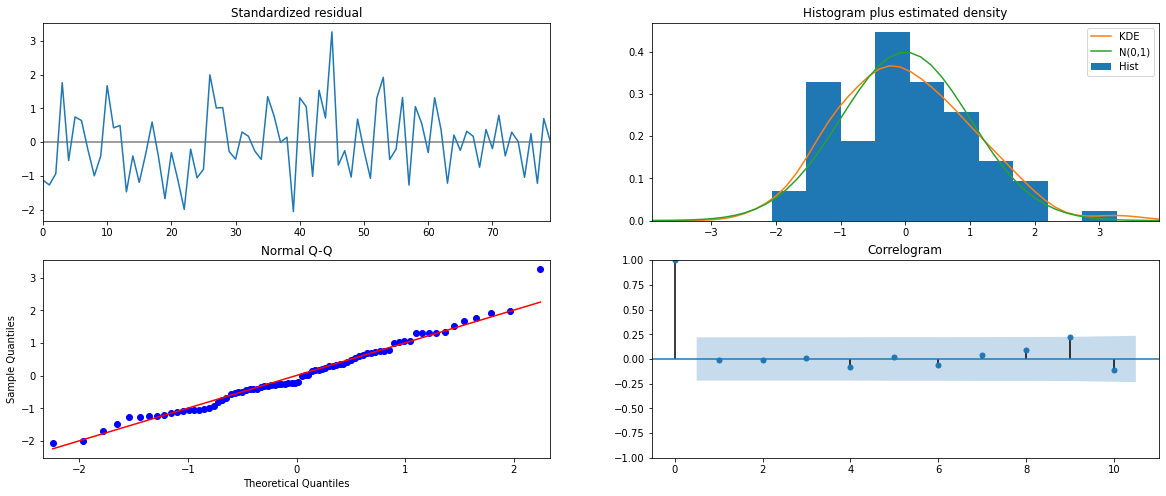

In [108]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [109]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [110]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.228519,14.458669,16.890048,73.566990
1,63.055844,14.503590,34.629330,91.482359
2,68.118195,14.453678,39.789506,96.446884
3,61.827248,14.449909,33.505947,90.148549
4,68.436808,14.470425,40.075295,96.798321


In [111]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

16.8240394486892


In [112]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(3,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(3,1,3)",15.983952
"ManualARIMA(4,1,2)",33.949348
"SARIMA(3,1,1)(3,1,1,12)",16.824039


# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

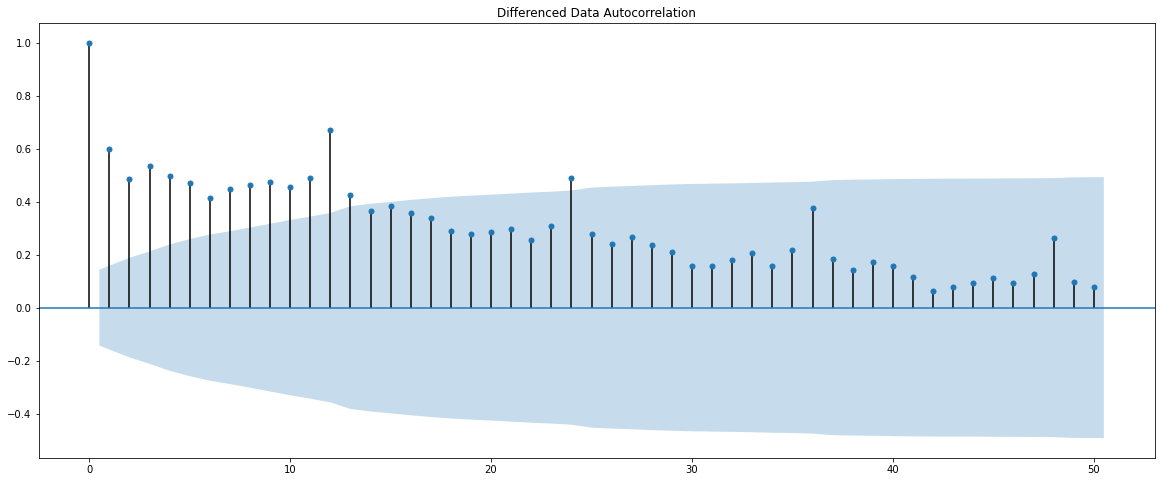

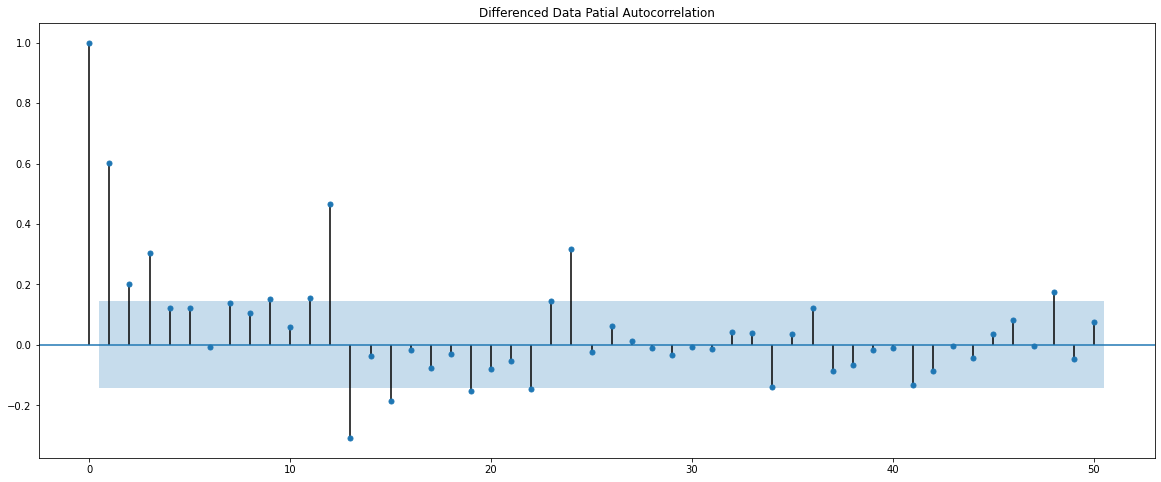

In [113]:
plot_acf(df['Rose'],lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'],lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

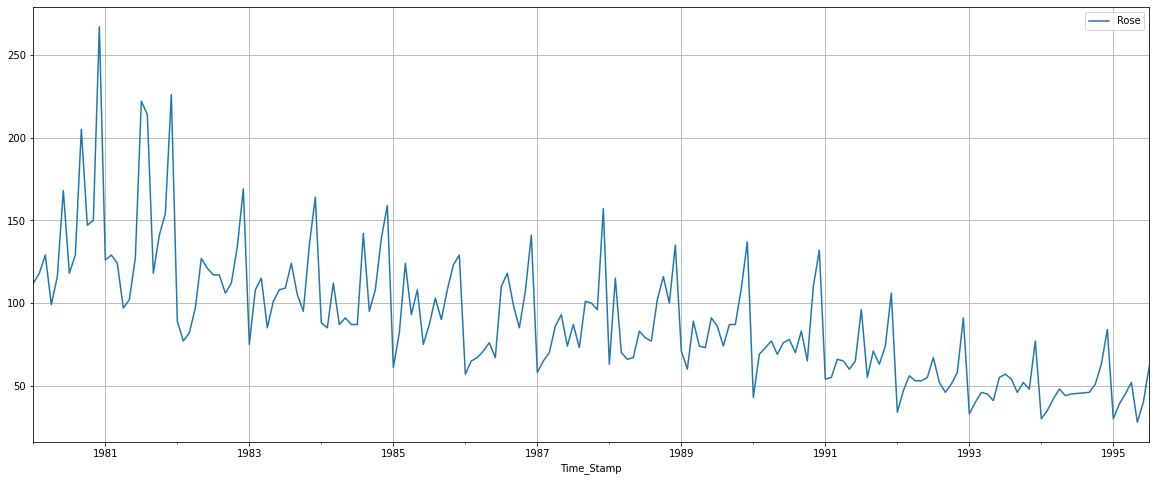

In [114]:
df.plot()
plt.grid();

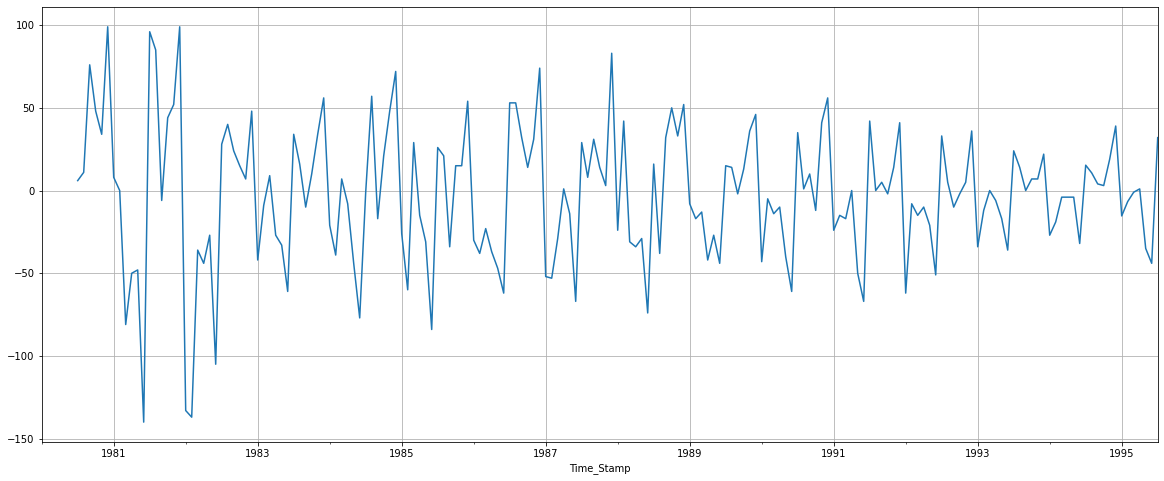

In [115]:
(df['Rose'].diff(6)).plot()
plt.grid();

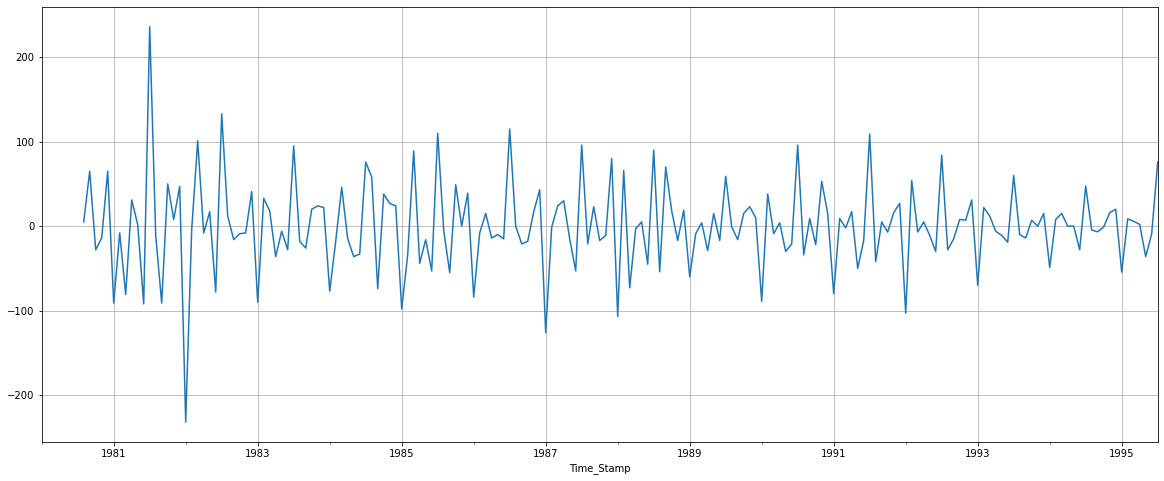

In [116]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

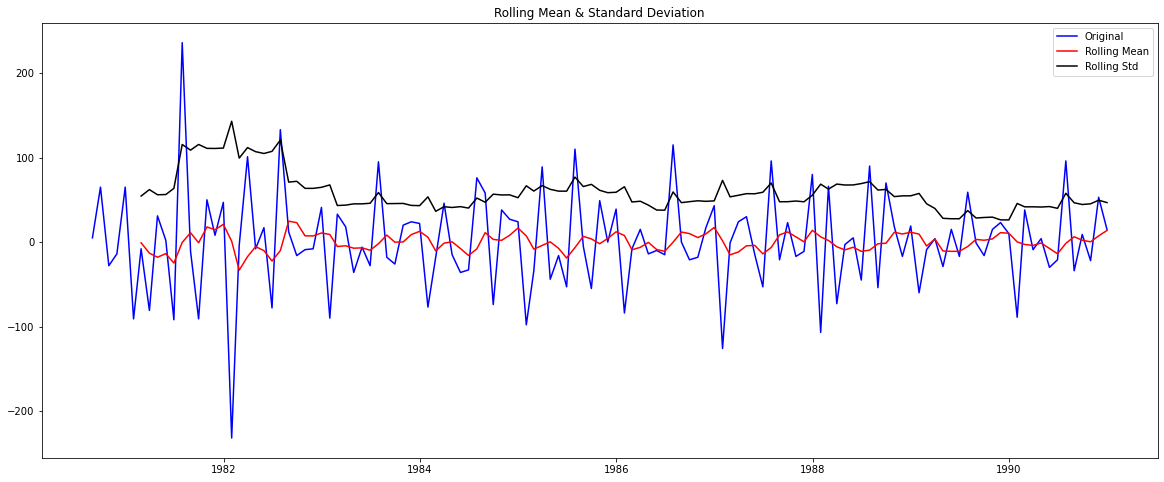

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [117]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

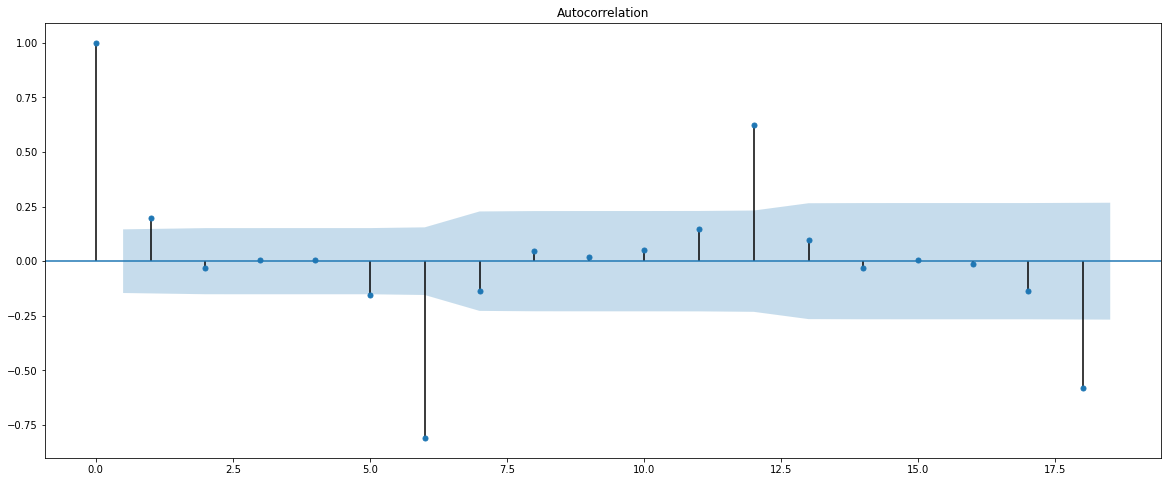

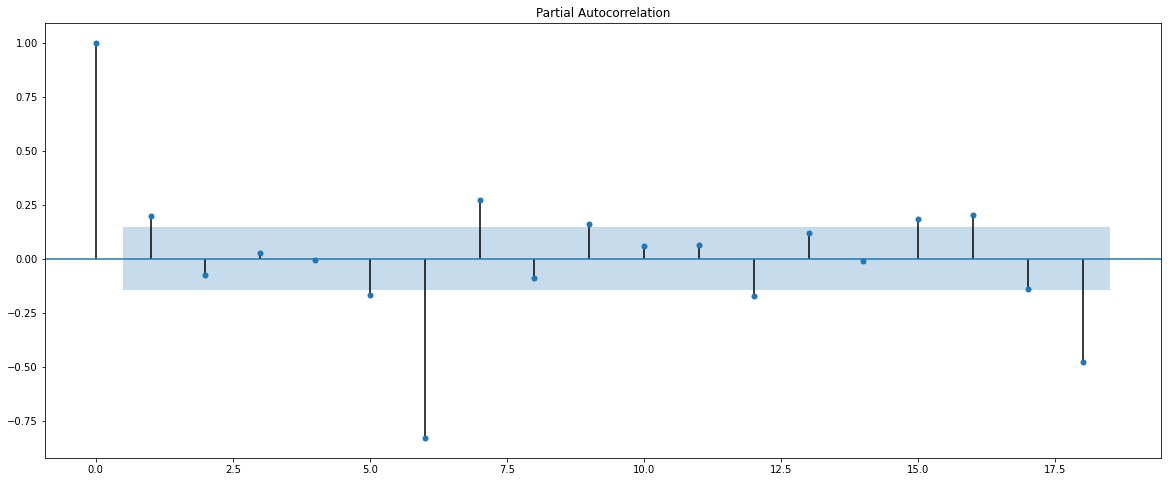

In [118]:
plot_acf((df['Rose'].diff(6).dropna()),lags=18)
plot_pacf((df['Rose'].diff(6).dropna()),lags=18);

In [119]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 6)   Log Likelihood                -443.175
Date:                           Wed, 09 Sep 2020   AIC                            904.350
Time:                                   14:21:47   BIC                            928.149
Sample:                                        0   HQIC                           913.991
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0912      0.144      0.634      0.526      -0.191       0.373
ar.L2         -0.1555      0.099     -1.577

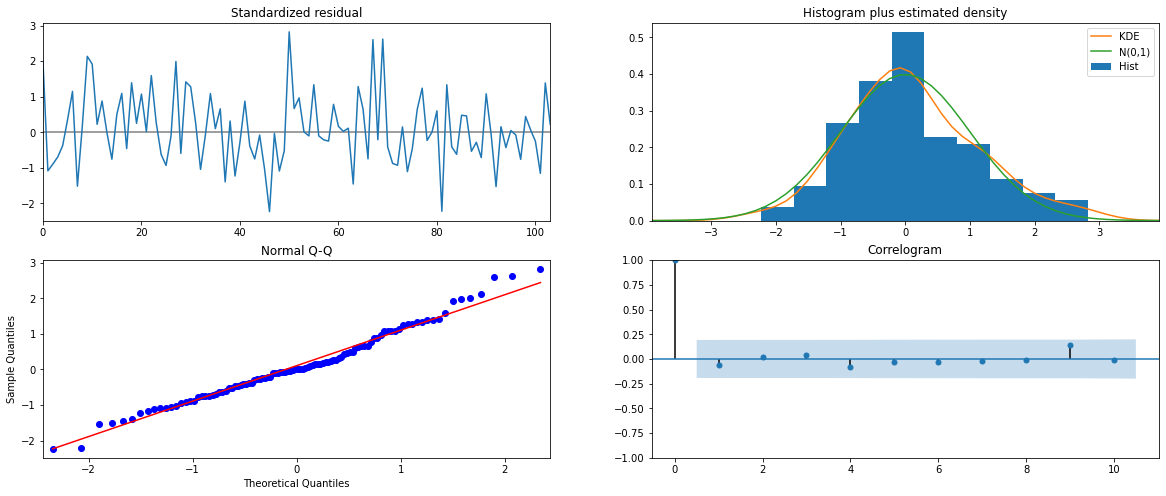

In [120]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model

In [121]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [122]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.012531,17.058075,21.579318,88.445743
1,55.628295,17.775669,20.788624,90.467965
2,71.043352,17.819473,36.117827,105.968878
3,72.276053,17.863899,37.263455,107.288651
4,70.146850,17.970191,34.925922,105.367778


In [234]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

11.755779679069796


In [123]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(3,1,1,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(3,1,3)",15.983952
"ManualARIMA(4,1,2)",33.949348
"SARIMA(3,1,1)(3,1,1,12)",16.824039
"SARIMA(3,1,1)(3,1,1,6)",16.824039


# Building the most optimum model on the Full Data

In [132]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -540.852
Date:                            Wed, 09 Sep 2020   AIC                           1099.704
Time:                                    15:50:31   BIC                           1125.852
Sample:                                01-31-1980   HQIC                          1110.330
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0378      0.112      0.337      0.736      -0.182       0.258
ar.L2         -0.0205      0.110   

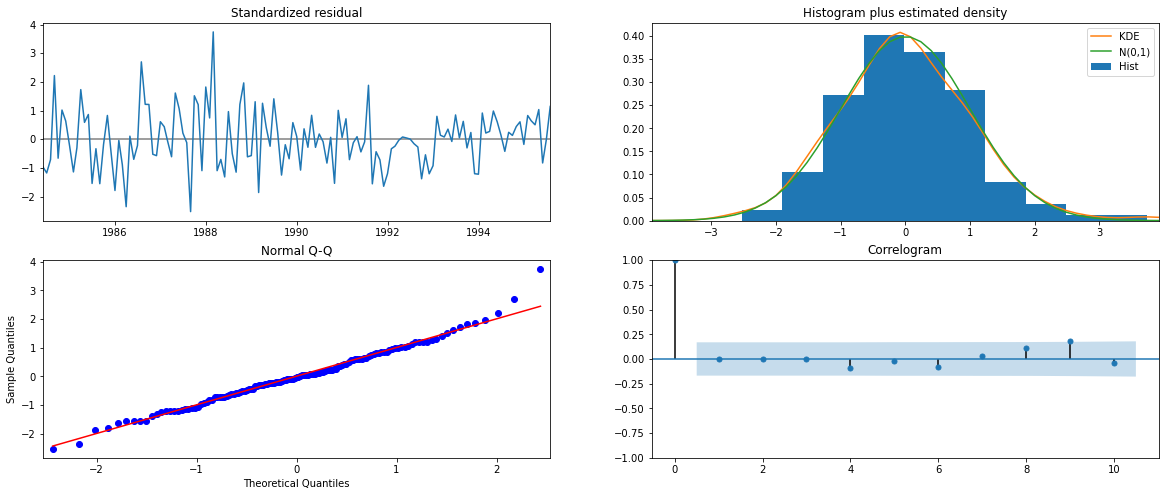

In [133]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [134]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [135]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,43.609873,12.957260,18.214110,69.005636
1995-09-30,44.539737,13.096984,18.870120,70.209355
1995-10-31,45.876250,13.154028,20.094829,71.657671
1995-11-30,58.082039,13.201232,32.208099,83.955979
1995-12-31,85.539162,13.274129,59.522347,111.555977


In [136]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.24073513522162


In [129]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

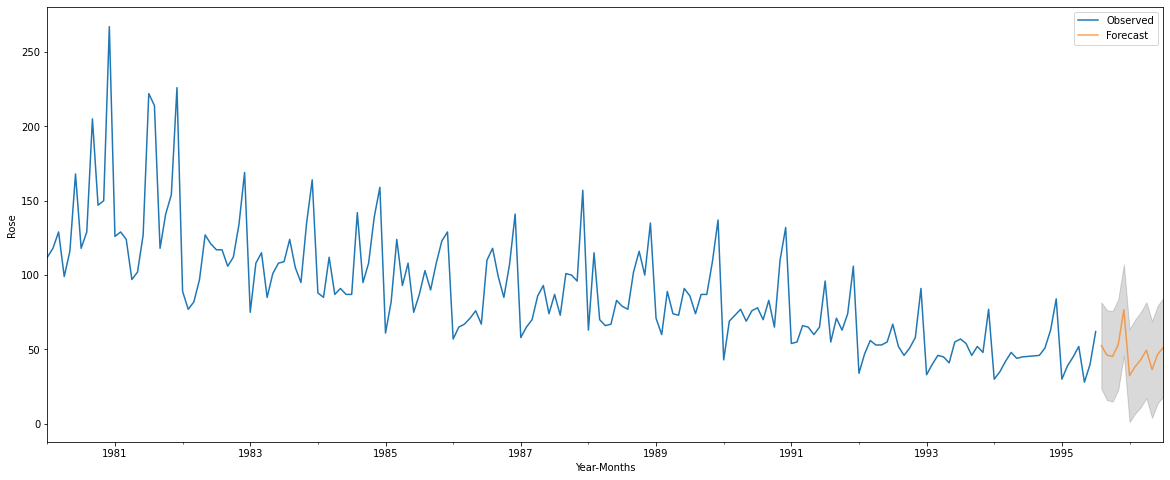

In [130]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [131]:
resultsDf

,RMSE
"ARIMA(3,1,3)",15.983952
"ManualARIMA(4,1,2)",33.949348
"SARIMA(3,1,1)(3,1,1,12)",16.824039
"SARIMA(3,1,1)(3,1,1,6)",16.824039
